# Meine dritte Projekt: Automatidata

Dieses Projekt ist Teil meines Datenanalysekurses, jedoch nicht verpflichtend. Ich mache es, um mich weiterzubilden.

### Überblick über das Geschäftsszenario

Ich bin Mitarbeiter bei der Firma Automatidata und wurde mit der Zusammenarbeit mit dem Kunden TLC beauftragt.

TLC ist ein Taxi- und Limousinenunternehmen, und seine Daten umfassen Fahrtdaten. Die Variablendefinitionen sind unten aufgeführt.

### Arbeitsplan

1. Planung
- Identifizieren von Variablen
- Importieren der erforderlichen Pakete und Module
- Untersuchen der Daten

2. Analyse
- Datenbereinigung
- Durchführen von EDA
- Grafiken und Figuren erstellen
- Erste Einblicke gewinnen
- Hypothesentests durchführen

3. Konstruktion
- Feature-Engineering
- Lineare Regressionen-Modelle
- Decision-Tree-Modelle
- Random-Forest-Modelle
- XGBoost-Modelle
- Refactoring und Eliminierung von Faktoren
- Hyperparameter-Tuning

4. Abschluss

## 1. Planung

### Variablen definieren / Datenwörterbuch

Variable  | Beschreibung |
---------|--------------|
Unnamed: 0 | Index der Zeile im Datensatz |
VendorID | ID des Taxiunternehmens (z. B. 1 oder 2) |
tpep_pickup_datetime | Datum und Uhrzeit des Fahrtbeginns |
tpep_dropoff_datetime | Datum und Uhrzeit des Fahrtendes |
passenger_count | Anzahl der Fahrgäste im Taxi |
trip_distance | Fahrtstrecke in Meilen |
RatecodeID | Tarifcode der Fahrt (z. B. Standardtarif, JFK, Newark) |
store_and_fwd_flag | Ob die Fahrt zwischengespeichert und später übertragen wurde („Y“ oder „N“) |
PULocationID | Standort-ID des Einstiegsorts |
DOLocationID | Standort-ID des Ausstiegsorts |
payment_type | Verwendete Zahlungsmethode (z. B. Bar, Kreditkarte) |
fare_amount | Grundfahrpreis der Fahrt |
extra | Zusätzliche Gebühren (z. B. für Stoßzeiten oder Nachtfahrten) |
mta_tax | Obligatorische MTA-Steuer für die Fahrt |
tip_amount | Trinkgeld, das vom Fahrgast gegeben wurde |
tolls_amount | Mautgebühren, die während der Fahrt angefallen sind |
improvement_surcharge | Zuschlag zur Unterstützung von Fahrerleistungen |
total_amount | Gesamtbetrag, der für die Fahrt berechnet wurde (inkl. aller Gebühren) |

### Installieren und Importieren der erforderlichen Pakete und Module

1. Erstellen Sie eine virtuelle Umgebung
2. Installieren Sie pip
3. Führen Sie diese Codezeile darunter aus.

In [1]:
# die in diesem Projekt verwendeten Pakete und Module sind in der Datei requirements.txt aufgeführt.
!pip install -r requirements.txt

In [2]:
# Erforderliche Importe

# Data manipulation packages
import pandas as pd
import numpy as np

#Date and time manipulation packages
import datetime as dt

# Graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis Testing packages
from scipy import stats

# Data preprocessing
from sklearn.model_selection import train_test_split

# Packages for OLS, MLR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

#Packages for gridsearchcv
from sklearn.model_selection import GridSearchCV

# Packages for DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

#Packages for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Packages for XGBRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance

#Packages for metrics to compare model performance
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

#Packages to save (pickle) models
import pickle

### Untersuchen der Daten

In [3]:
# Importieren der Daten
df = pd.read_csv("data/2017_Yellow_Taxi_Trip_Data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Anmerkungen:**

- Es gibt 2 Datumsvariablen, die neu formatiert werden müssen.
- Die kategoriale Variable `store_and_fwd_flag` folgt einer nominalen Skala.
- `RatecodeID` ist ebenfalls eine kategoriale Variable, die einer nominalen Skala folgt.
- `payment_type` ist ebenfalls eine kategoriale Variable, die einer nominalen Skala folgt.


Die Klassen `payment_type` und `RatecodeID` sind nachfolgend aufgeführt:

`RatecodeID`

1 = Standardtarif  
2 = JFK-Flughafen  
3 = Newark-Flughafen  
4 = Nassau oder Westchester  
5 = Vereinbarter Fahrpreis  
6 = Gruppenfahrt 

`payment_type`

1 = Kreditkarte  
2 = Barzahlung  
3 = Frei  
4 = Unbekannt  
5 = Geschenkkarte  
6 = Digitales Zahlungsmittel (z. B. Apple Pay) 

## 2. Analyse

### Datenbereinigung und Durchführen von EDA

In [5]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Anmerkungen:**

Probleme mit den zu untersuchenden Daten:

- `passenger_count` hat einen Mindestwert von 0.
- `trip_distance` hat einen Mindestwert von 0.
- `trip_distance` hat einen Höchstwert von 33,98, während der Mittelwert bei 2,9 liegt.
- `RatecodeID` hat einen Höchstwert von 99.
- `fare_amount` und ähnliche Variablen, die nur positive Werte enthalten sollten, weisen negative Werte auf.
- Der Maximalwert von `fare_amount` beträgt 999,99.
- Der Maximalwert von `tolls_amount` beträgt 19,1.

Es gibt keine Anzeichen für fehlende Daten. Es muss auf doppelte Daten überprüft werden.

**Ich werde Grafiken und Figuren erstellen, um potenzielle Ausreißer besser erkennen zu können. Siehe ipynb Nummer 3.**

Boxplots und Histogramme sind am besten geeignet, um Ausreißer zu erkennen.

In [7]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

`passenger_count`

Text(0.5, 1.0, 'passenger_count')

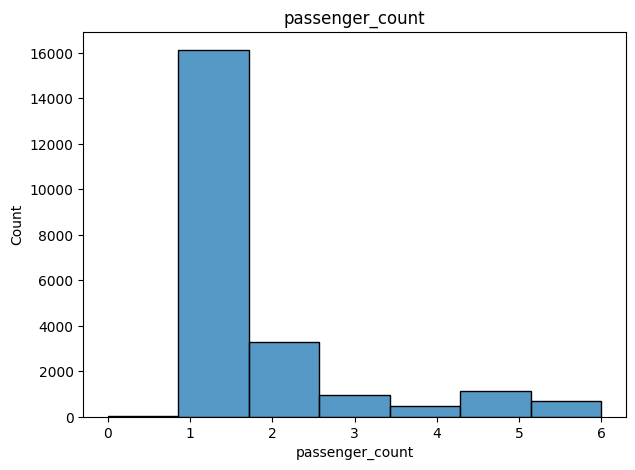

In [8]:
# create a histogram of passenger_count
plt.figure(figsize=(7,5))
sns.histplot(data=df['passenger_count'],bins = 7)
plt.title('passenger_count')

In [9]:
df.value_counts('passenger_count')

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

Es gibt 33 Fahrten mit 0 Passagieren. Es wäre am besten, diese zu löschen, wenn Sie in Zukunft Modelle erstellen.

Die meisten Fahrten haben nur einen Passagier.

In [10]:
df = df[df['passenger_count'] != 0]

`trip_distance`

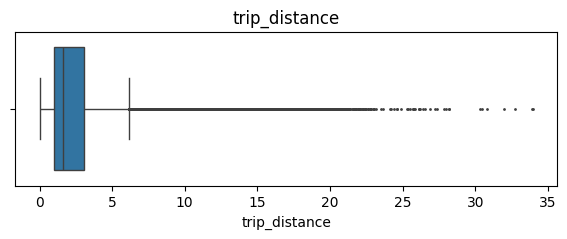

In [11]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

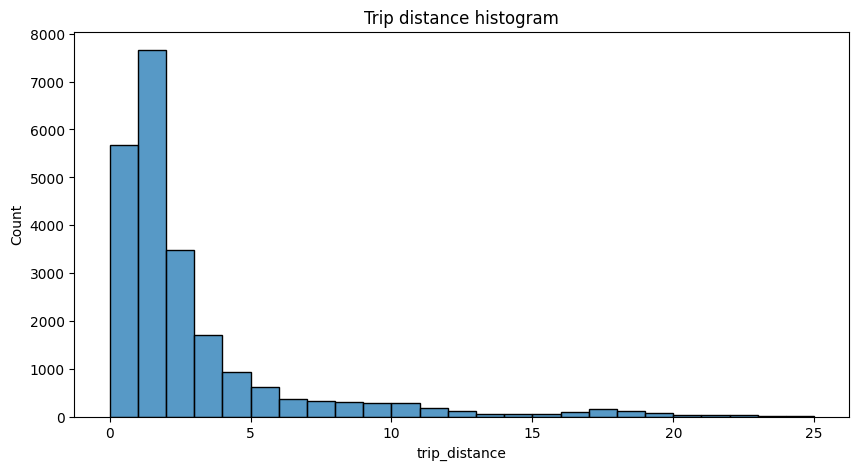

In [12]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

**Das Problem der extremen Ausreißer bei trip_distance muss bei der linearen Regression gelöst werden.**

**Mögliche Lösungen:**


1. Log-Normalisierung
2. Umwandlung in eine kategoriale Variable mit 3 Kategorien: Kurz, Mittel und Lang

`total_amount`

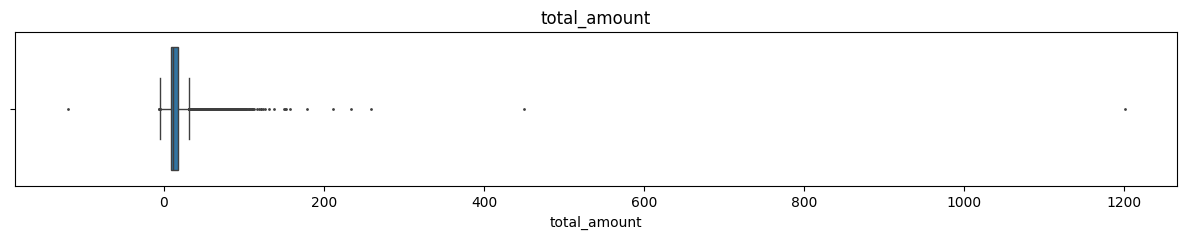

In [13]:
# Create box plot of total_amount
plt.figure(figsize=(15,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

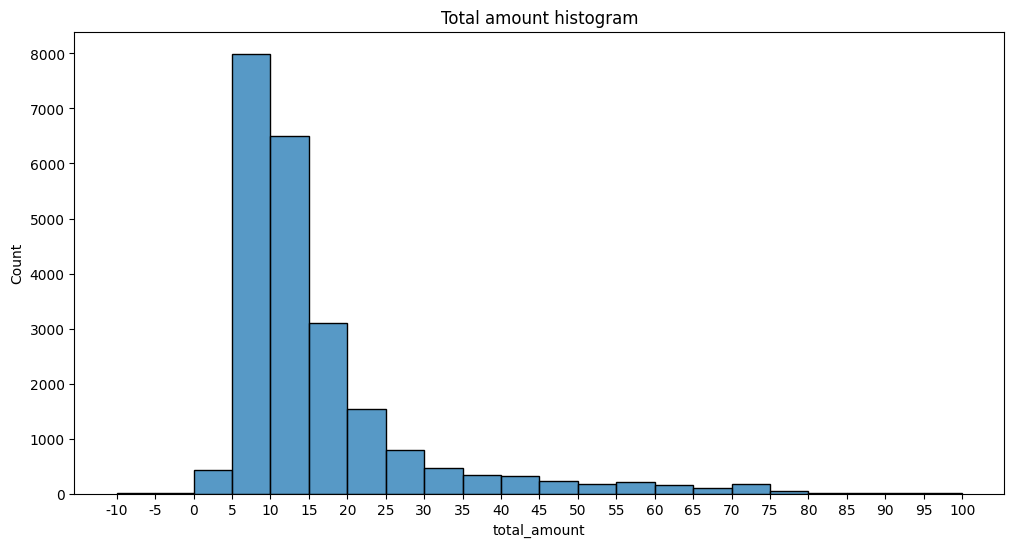

In [14]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

**Die negativen Fahrpreisbeträge können gelöscht werden.**

**Die rechtsverzerrte Variable muss wie „trip_distance“ behandelt werden.**

In [15]:
df = df[df['total_amount'] >= 0]

`tip_amount`

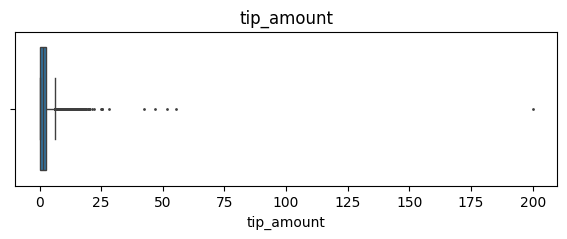

In [16]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

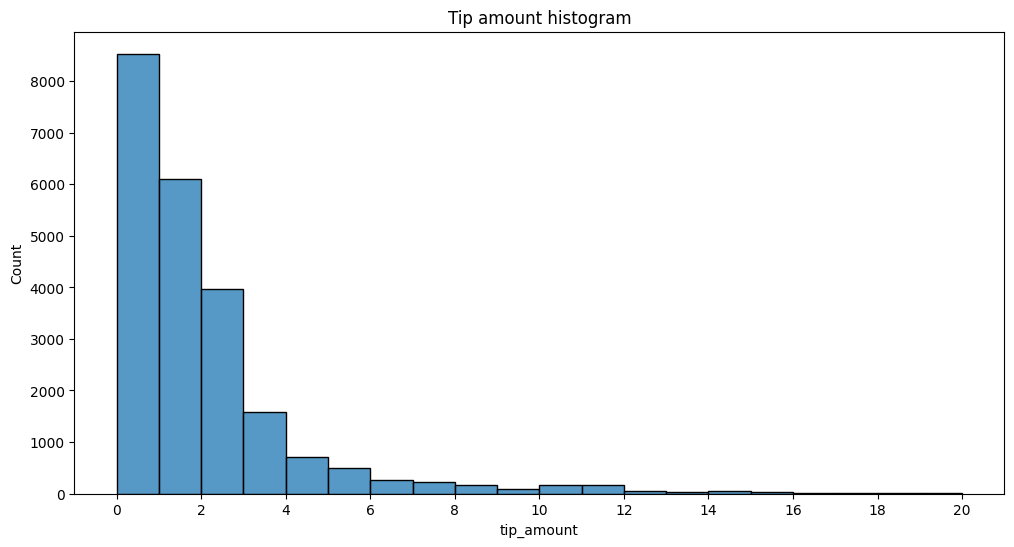

In [17]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

**Der `tip_amount` ist ebenfalls rechtsverzerrt.**

**Alle Variablen, die sich auf die Höhe der gezahlten Beträge beziehen, sind rechtsverzerrt aufgrund von:**
1. sehr teuren Reisen
2. sehr großzügigen Trinkgeldern

**Ich werde nun die negativen Werte aus diesen Variablen entfernen.**

In [18]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.265200e+04,22652.000000,22652,22652,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000,22652.000000
mean,5.670268e+07,1.556772,2017-06-29 02:47:20.691947776,2017-06-29 03:04:18.650847488,1.644623,2.915512,1.038981,162.429543,161.533198,1.335776,13.040251,0.333944,0.498035,1.836479,0.312681,0.299921,16.326602
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.845999e+07,1.000000,2017-03-29 23:23:51.500000,2017-03-29 23:35:14.249999872,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.668038e+07,2.000000,2017-06-23 08:38:32.500000,2017-06-23 08:56:09,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.526801e+07,2.000000,2017-10-01 20:58:03.500000,2017-10-01 21:07:11.750000128,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.273010e+07,0.496777,NaN,NaN,1.284438,3.655180,0.280216,66.630138,70.124493,0.493393,13.212479,0.462950,0.031280,2.802231,1.399658,0.004882,16.071055


**Negative Werte wurden bereits beim Bereinigen der Variablen `tip_amount` und `total_amount` entfernt.**

Bereinigung der Variablen „trip_distance“.

Überprüfung der Fahrten mit einer Distanz von 0 oder ähnlichen Werten.

In [19]:
df.sort_values(by= 'trip_distance', ascending=True)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
20638,106367018,1,2017-12-15 16:09:43,2017-12-15 16:09:43,1,0.00,1,N,43,264,2,2.50,1.0,0.5,0.00,0.00,0.3,4.30
22670,17852208,1,2017-03-03 23:09:16,2017-03-03 23:09:35,1,0.00,1,N,132,132,3,2.50,0.5,0.5,0.00,0.00,0.3,3.80
20549,47656665,2,2017-06-02 18:33:13,2017-06-02 18:33:23,1,0.00,1,N,239,239,2,2.50,1.0,0.5,0.00,0.00,0.3,4.30
1275,16021717,2,2017-02-28 05:46:44,2017-02-28 05:46:49,1,0.00,1,N,264,163,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80
9155,101666430,1,2017-12-01 18:41:19,2017-12-01 18:41:19,4,0.00,1,N,163,264,2,2.50,1.0,0.5,0.00,0.00,0.3,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21


Text(0.5, 1.0, 'Trip distances <=1 Histogram')

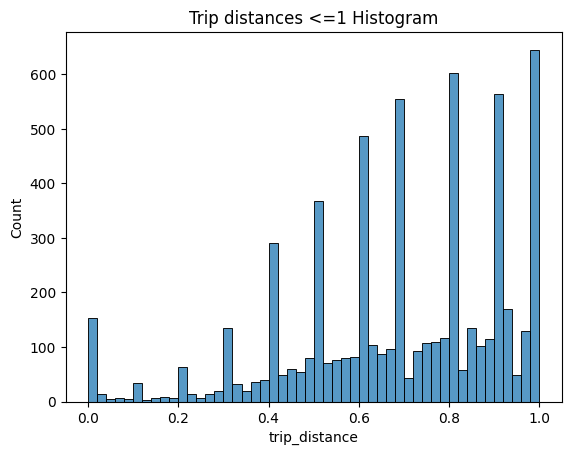

In [20]:
df_trips = df[df['trip_distance'] <=1]
ax = sns.histplot(data = df_trips, x = 'trip_distance', bins=np.arange(0, 1.02, 0.02));
plt.title('Trip distances <=1 Histogram')

In [21]:
df_trips_0 = df[df['trip_distance'] == 0]
df_trips_0.shape


(146, 18)

Es gibt 146 Zeilen mit dem Wert 0 für `trip_distance`. Ich werde sie löschen.

Dies sind Testfahrten oder Fahrten, die hätten abgesagt werden sollen, aber aufgrund menschlicher Fehler nicht abgesagt wurden.

In [22]:
df = df[df['trip_distance'] != 0]

### Erste Einblicke durch Figuren und Grafiken gewinnen

Überprüfung der Unterschiede zwischen den beiden Klassen in `VendorID`

`total_amount`, `payment_type`, `VendorID`

In [23]:
df = df.rename(columns={"VendorID" : "vendor_id"})

In [24]:
df.value_counts('vendor_id')

vendor_id
2    12548
1     9958
Name: count, dtype: int64

In [25]:
mean_vendor_amount = df[['total_amount', 'vendor_id']].groupby('vendor_id').mean()
mean_vendor_amount

,total_amount
vendor_id,
1,16.290988
2,16.225912


Do i do t-test to test if the means are significantly different from each other by vendor?

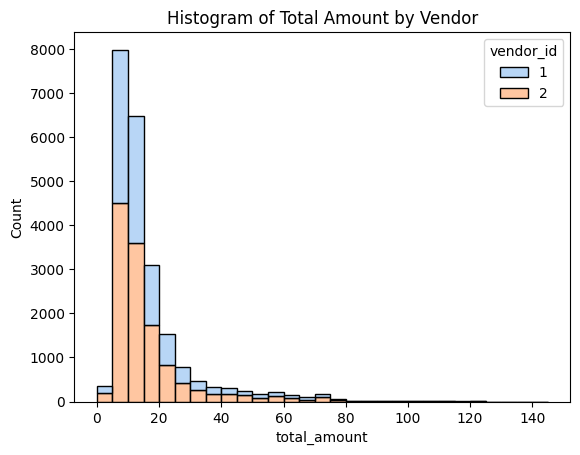

In [26]:
# Histogram of Total Amount by Vendor
ax = sns.histplot(data = df, x = "total_amount", hue = 'vendor_id', bins=range(0,150,5), multiple='stack',palette='pastel')
plt.title('Histogram of Total Amount by Vendor')
ax.plot;

In [27]:
df.value_counts('payment_type')

payment_type
1    15177
2     7198
3       94
4       37
Name: count, dtype: int64

Es gibt keine Zahlungsarten mit Geschenkkarte und digitalen Zahlungsmethoden.

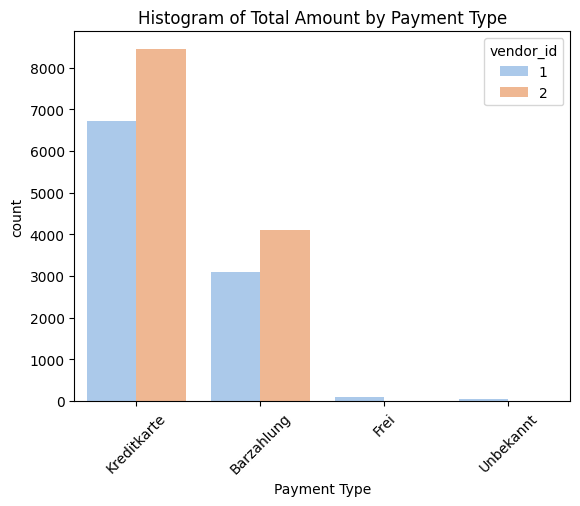

In [28]:
# Histogram of Total Amount by Payment Type

payment_labels = [
    "Kreditkarte", 
    "Barzahlung", 
    "Frei", 
    "Unbekannt"
]

ax = sns.countplot(data=df, x='payment_type', hue='vendor_id', palette='pastel')
plt.title('Histogram of Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.xticks(ticks=range(4), labels=payment_labels, rotation=45)
ax.plot;

Entfernen von kostenlosen Fahrten aus den Daten, da sie Teil eines Sonderangebots waren und die Population nicht korrekt repräsentieren.

In [29]:
df = df[df['total_amount'] > 0]
df = df[df['fare_amount'] > 0]

`passenger_count` und `total_amount`

In [30]:
mean_total_passenger = df[['passenger_count', 'total_amount']].groupby(['passenger_count']).mean()
mean_total_passenger

,total_amount
passenger_count,
1,16.049992
2,17.142871
3,16.577756
4,16.492222
5,16.283004
6,16.176962


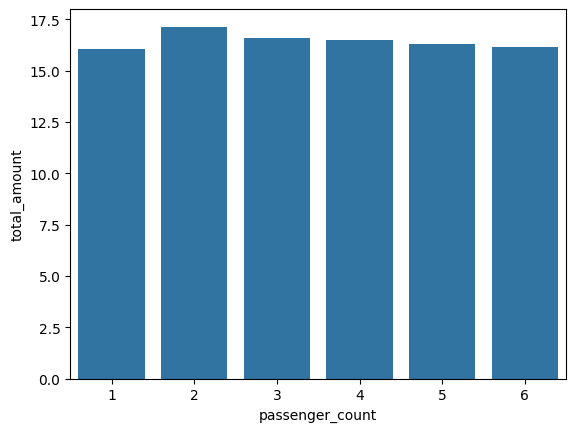

In [31]:
# Barplot of the means

ax = sns.barplot(data = mean_total_passenger, x = 'passenger_count', y = 'total_amount');

Do anova here perhaps for shit above

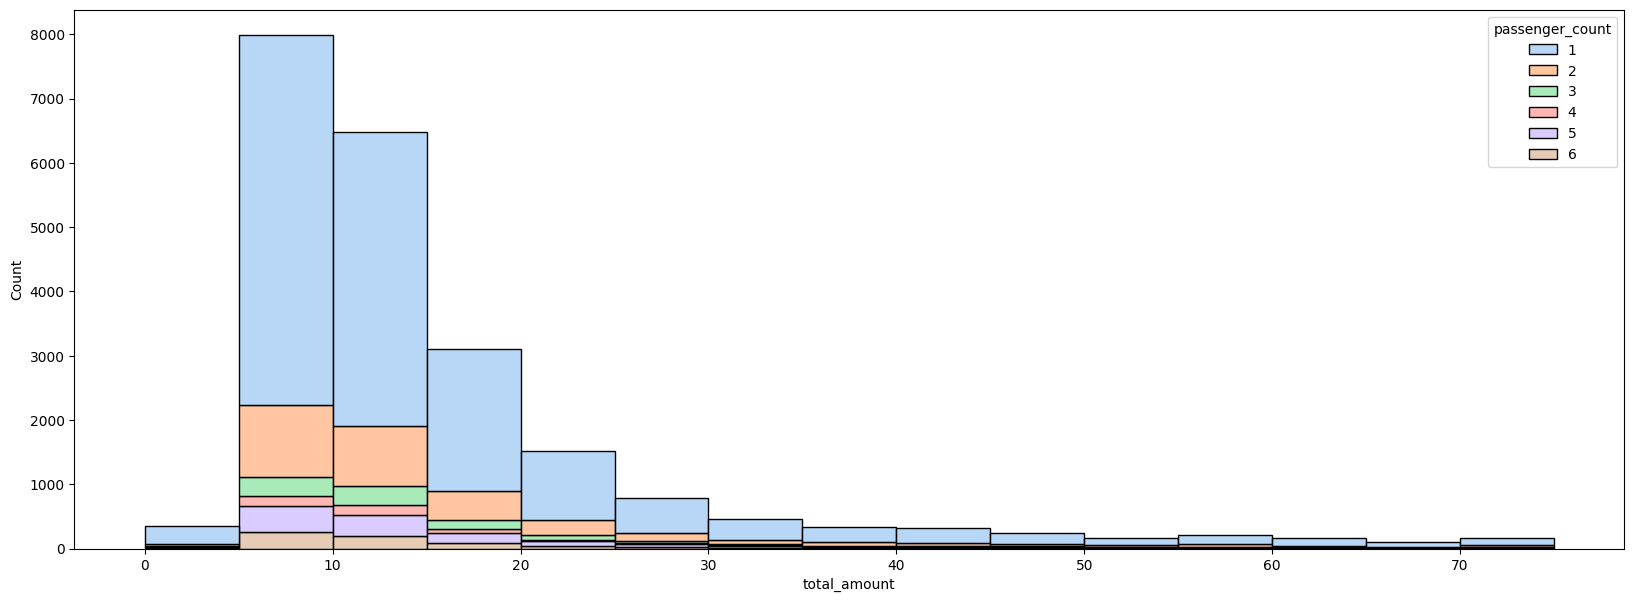

In [32]:
# Histplot of `total_amount` grouped by `passenger_count`

plt.figure(figsize=(20,7))
ax = sns.histplot(data = df, x = 'total_amount', hue = 'passenger_count', palette='pastel',bins=range(0,80,5), multiple='stack')


**`total_amount` ändert sich nicht, wenn er höher wird, je nachdem, wie viele Passagiere es gibt.**

`total_amount` und `trip_distance`

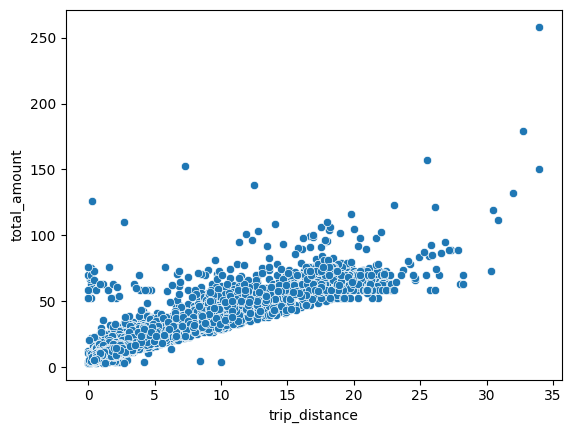

In [33]:
#scatterplot
df_edited = df[df['total_amount'] < 1200] #removing the 1 outlier
ax = sns.scatterplot(data = df_edited, x = "trip_distance", y = "total_amount");

**Es besteht eine positive Korrelation zwischen diesen beiden Variablen.**

`total_amount` und `month` und `day`

In [34]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [35]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts().reset_index()
monthly_rides

,month,count
0,March,2030
1,October,2007
2,April,2005
3,May,2003
4,January,1981
5,June,1945
6,December,1830
7,November,1823
8,February,1758
9,September,1724


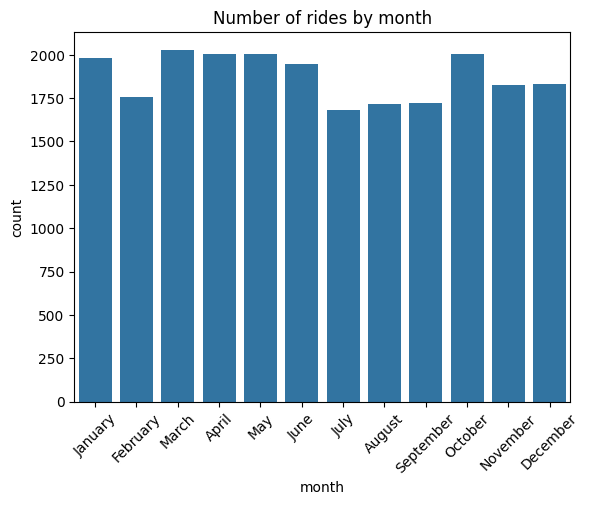

In [36]:
#barplot
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]

ax = sns.barplot(data = monthly_rides, x = 'month', y = 'count', order=months)
plt.xticks(rotation=45)
plt.title('Number of rides by month')
plt.show()

**Die monatlichen Fahrten sind relativ konstant, mit deutlichen Rückgängen in den Sommermonaten Juli, August und September sowie im Februar.**

In [37]:
daily_ride = df['day'].value_counts().reset_index()
daily_ride

,day,count
0,Friday,3383
1,Thursday,3368
2,Wednesday,3365
3,Saturday,3347
4,Tuesday,3161
5,Sunday,2970
6,Monday,2909


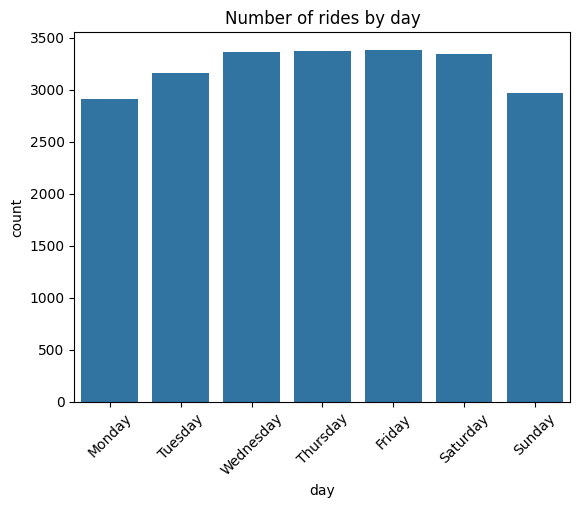

In [38]:
#barplot

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

ax = sns.barplot(data = daily_ride, x='day', y = 'count', order=days)
plt.xticks(rotation = 45)
plt.title('Number of rides by day')
plt.show()


**Von Mittwoch bis Samstag gab es die meisten Fahrten pro Tag, während Sonntag und Montag die wenigsten Fahrten verzeichneten.**

In [39]:
amount_day = df[['total_amount', 'day']].groupby('day').sum().reindex(index = days)
amount_day

,total_amount
day,
Monday,49116.99
Tuesday,51004.41
Wednesday,54946.63
Thursday,56549.21
Friday,55475.00
Saturday,50907.86
Sunday,47815.20


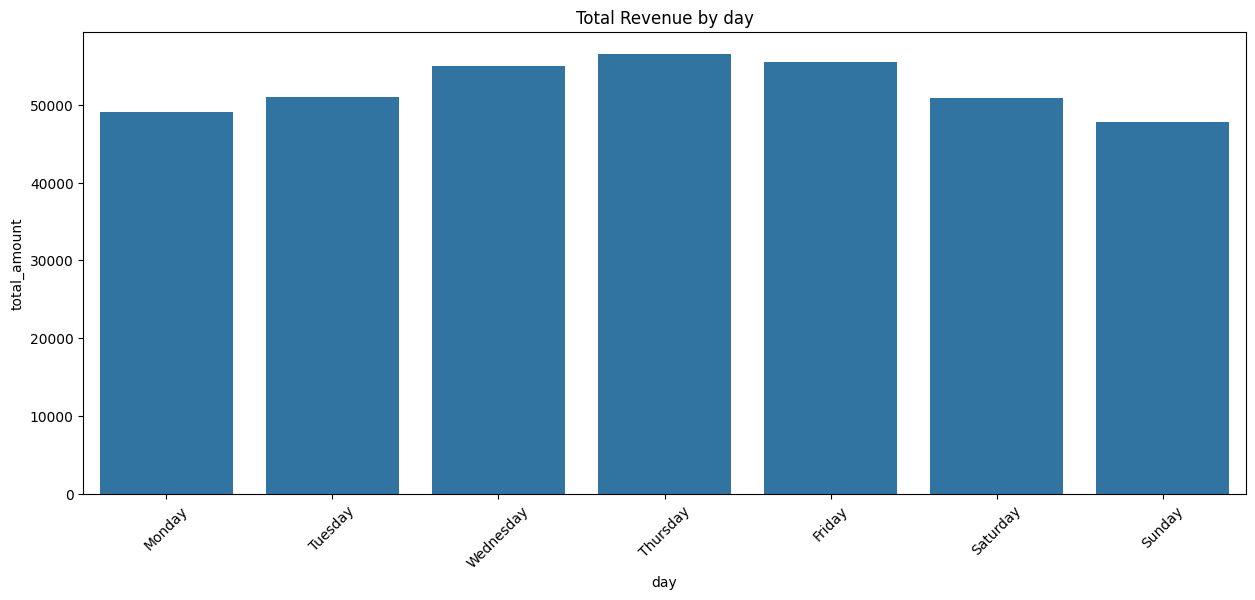

In [40]:
# barplot

plt.figure(figsize = (15,6))
ax = sns.barplot(data = amount_day, x = 'day', y = 'total_amount')
plt.title('Total Revenue by day')
plt.xticks(rotation = 45)
plt.show()


In [41]:
amount_month = df[['total_amount', 'month']].groupby('month').sum().reindex(index = months)
amount_month

,total_amount
month,
January,31187.59
February,28785.67
March,32794.00
April,31845.88
May,33629.89
June,32183.10
July,26369.60
August,27563.26
September,28080.42


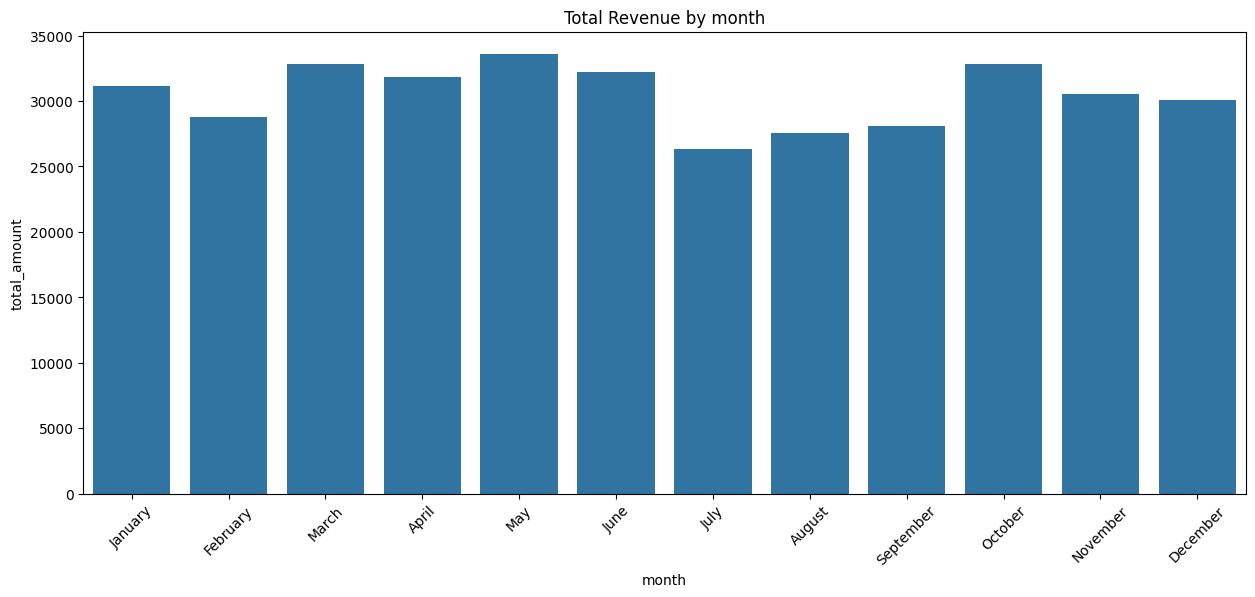

In [42]:
# barplot

plt.figure(figsize = (15,6))
ax = sns.barplot(data = amount_month, x = 'month', y = 'total_amount')
plt.title('Total Revenue by month')
plt.xticks(rotation = 45)
plt.show()


**Die monatlichen Einnahmen folgen in der Regel dem Muster der monatlichen Fahrten, mit deutlichen Einbrüchen in den Sommermonaten Juli, August und September sowie im Februar.**

**Zusammenfassung bis hierher**

- Die logischsten Determinanten für die Fahrkosten sind `day`, `month`, und `trip_distance`
- Ich werde nun die Abhol- und Zielorte sowie die Dauer der Fahrt betrachten.

Erstellen einer Zeitvariablen

In [43]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

Bereinigung der Daten der neuen Variablen

In [44]:
df.sort_values(by = 'trip_duration', ascending=True).head(10)

,Unnamed: 0,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.70,1,N,161,157,...,28.0,0.5,0.5,0.00,0.0,0.3,29.30,November,Sunday,-1 days +23:43:01
20180,78001169,2,2017-09-16 14:30:38,2017-09-16 14:30:39,2,1.67,1,N,264,158,...,12.5,0.0,0.5,3.99,0.0,0.3,17.29,September,Saturday,0 days 00:00:01
13306,39596850,1,2017-05-16 18:30:45,2017-05-16 18:30:47,1,8.40,1,N,264,264,...,2.5,1.0,0.5,0.00,0.0,0.3,4.30,May,Tuesday,0 days 00:00:02
21593,30477355,1,2017-04-14 21:18:30,2017-04-14 21:18:32,1,1.20,1,N,186,186,...,2.5,0.5,0.5,0.00,0.0,0.3,3.80,April,Friday,0 days 00:00:02
22102,58997093,1,2017-07-11 14:42:04,2017-07-11 14:42:06,1,1.10,1,N,178,178,...,2.5,0.0,0.5,0.00,0.0,0.3,3.30,July,Tuesday,0 days 00:00:02
7167,19209539,2,2017-03-07 16:42:46,2017-03-07 16:42:48,1,0.20,2,N,264,132,...,52.0,4.5,0.5,17.19,0.0,0.3,74.49,March,Tuesday,0 days 00:00:02
6708,91660295,2,2017-10-30 11:23:46,2017-10-30 11:23:49,1,0.32,5,N,264,83,...,100.0,0.0,0.5,25.20,0.0,0.3,126.00,October,Monday,0 days 00:00:03
2223,107141314,1,2017-12-17 20:35:28,2017-12-17 20:35:31,1,10.00,1,N,132,132,...,2.5,0.5,0.5,0.00,0.0,0.3,3.80,December,Sunday,0 days 00:00:03
13494,111339767,2,2017-01-15 05:04:18,2017-01-15 05:04:21,1,0.02,1,N,264,42,...,2.5,0.5,0.5,0.00,0.0,0.3,3.80,January,Sunday,0 days 00:00:03
13762,34602353,1,2017-04-29 03:14:50,2017-04-29 03:14:53,1,6.40,3,N,152,152,...,20.0,0.5,0.0,0.00,0.0,0.3,20.80,April,Saturday,0 days 00:00:03


In [45]:
df['duration_minutes'] = df['trip_duration'].dt.total_seconds()/60

`duration_minutes` und `total_amount`

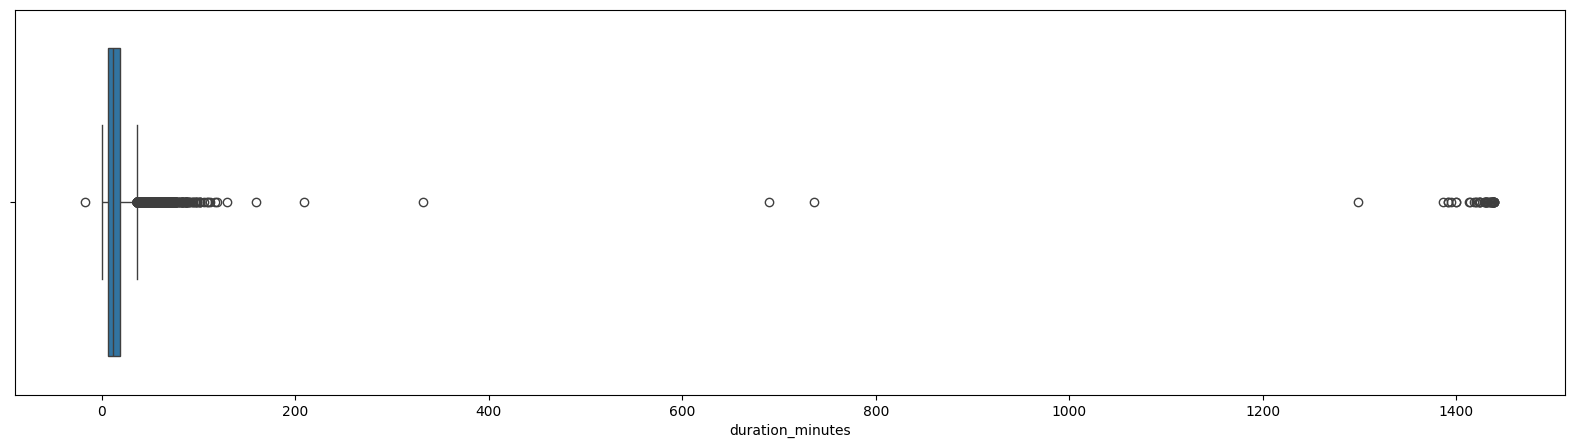

In [46]:
# box plot

plt.figure(figsize = (20,5))
ax = sns.boxplot(data = df, x = 'duration_minutes')

Es gibt extreme Ausreißer.

Für den Moment entferne ich die negativen Werte.

In [47]:
df = df[df['duration_minutes'] > 0]

Grafiken, die den Zusammenhang zwischen `duration_minutes` und `total_amount` zeigen

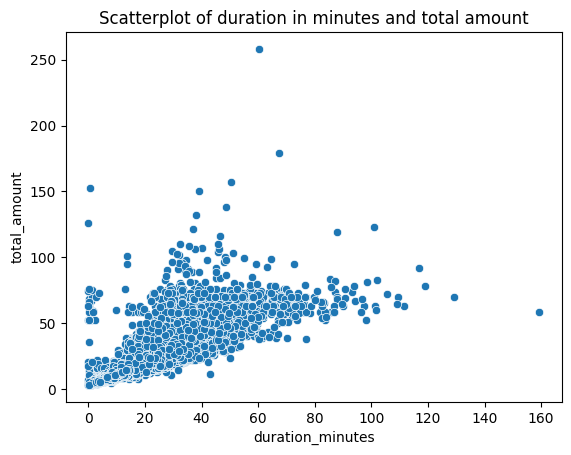

In [48]:
# scatterplot
df_edited = df[(df['duration_minutes'] <= 200) & (df['total_amount'] < 1100)]
ax = sns.scatterplot(data = df_edited, x = 'duration_minutes', y = 'total_amount')
plt.title('Scatterplot of duration in minutes and total amount')
plt.show()

**Es besteht eine positive Korrelation zwischen diesen beiden Variablen.**

`DOLocationID` und `total_amount` und `duration_minutes` und `trip_distance`

In [49]:
# Number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [50]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df[['DOLocationID', 'total_amount', 'duration_minutes', 'trip_distance']].groupby('DOLocationID').mean()
distance_by_dropoff

,total_amount,duration_minutes,trip_distance
DOLocationID,,,
1,98.732187,38.517708,18.091562
4,13.714554,12.177393,2.436634
7,19.659655,17.887548,4.056092
9,29.800000,21.391667,9.305000
10,14.593333,8.986111,3.750000
...,...,...,...
261,21.358707,19.843822,4.958621
262,15.362808,13.276859,2.872923
263,14.058937,15.969391,2.510136


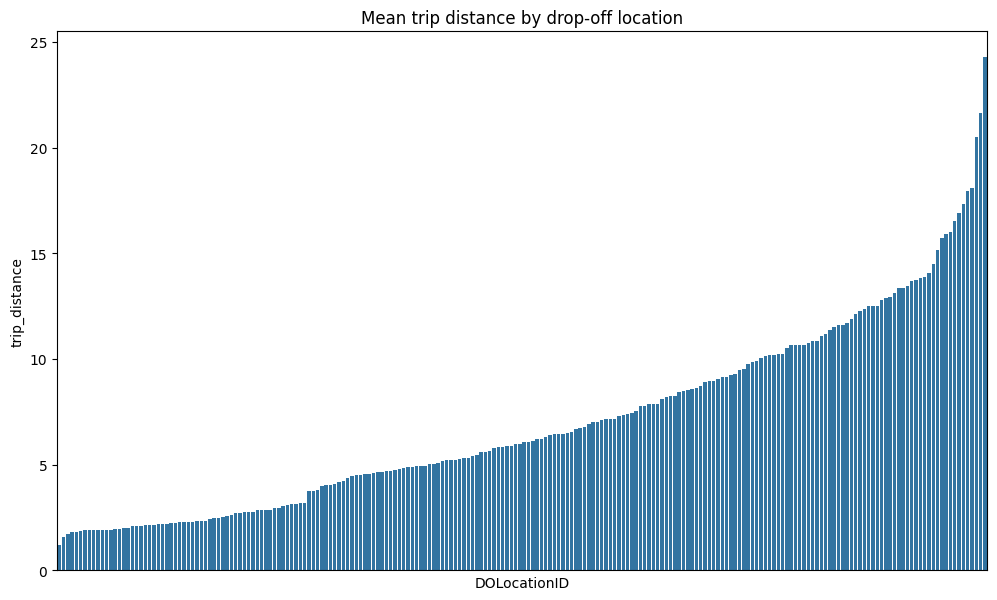

In [51]:
# barplot by trip_distance

distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')


plt.figure(figsize = (12,7))
ax = sns.barplot(data = distance_by_dropoff, x = 'DOLocationID', y = 'trip_distance',order=distance_by_dropoff.index)
plt.title('Mean trip distance by drop-off location')
plt.xticks([])
plt.show()


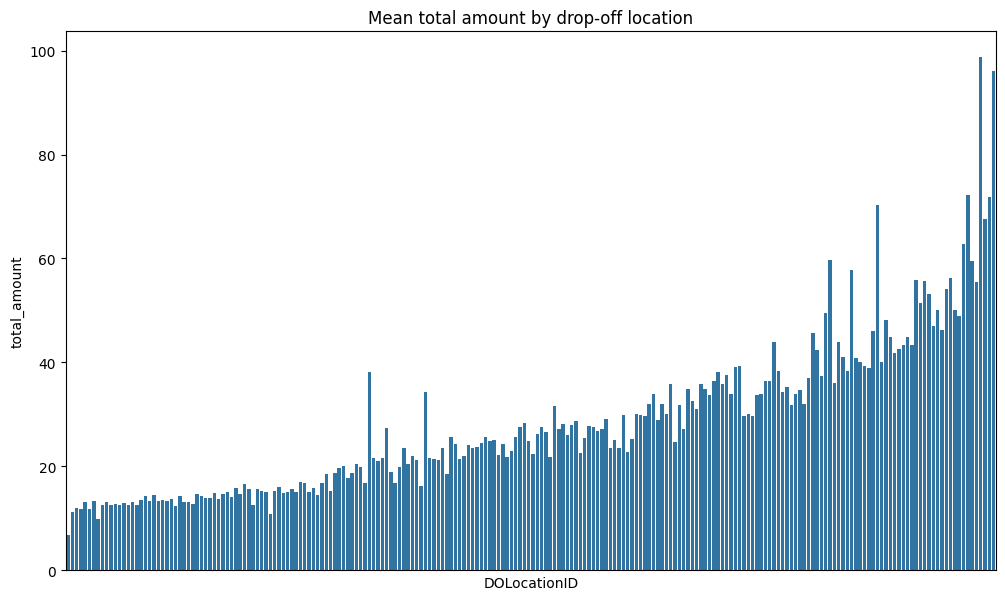

In [52]:
# barplot by total_amount

distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')


plt.figure(figsize = (12,7))
ax = sns.barplot(data = distance_by_dropoff, x = 'DOLocationID', y = 'total_amount',order=distance_by_dropoff.index)
plt.title('Mean total amount by drop-off location')
plt.xticks([])
plt.show()


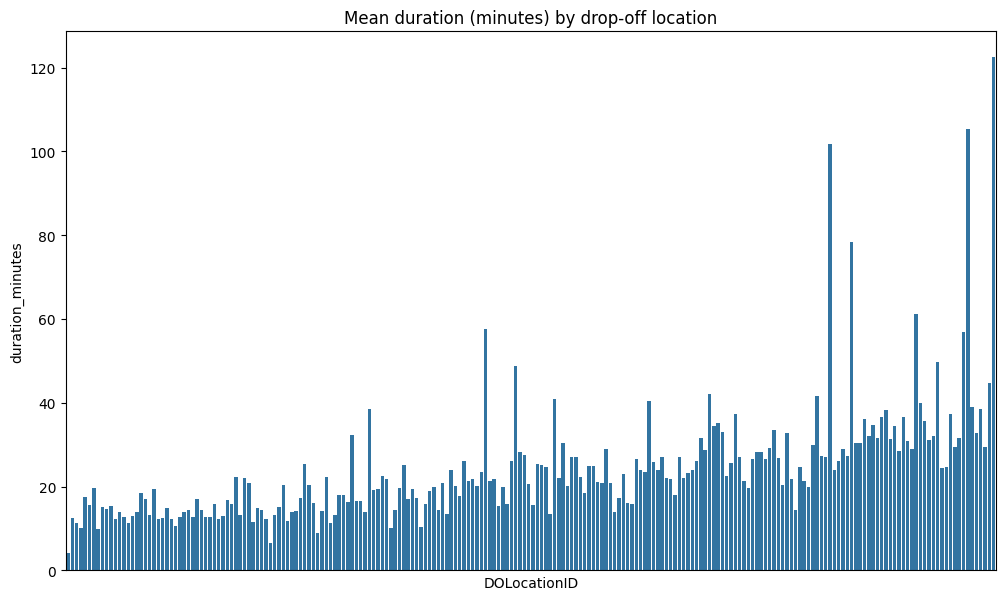

In [53]:
# barplot by total_amount

distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')


plt.figure(figsize = (12,7))
ax = sns.barplot(data = distance_by_dropoff, x = 'DOLocationID', y = 'duration_minutes',order=distance_by_dropoff.index)
plt.title('Mean duration (minutes) by drop-off location')
plt.xticks([])
plt.show()


Diese 3 Grafiken zeigen, dass es eine positive Korrelation zwischen `duration_minutes`, `total_amount` und `trip_distance` gibt.

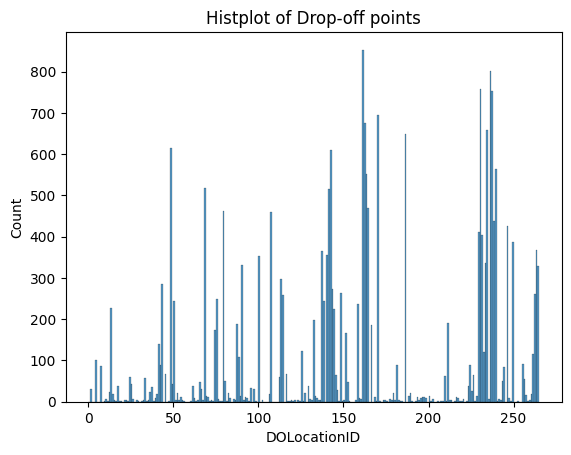

In [54]:
# Hisplot

ax = sns.histplot(data = df, x = "DOLocationID", bins=range(0, df['DOLocationID'].max()+1, 1))
plt.title('Histplot of Drop-off points');

Beachten Sie, dass von den über 200 Abgabestellen eine überproportionale Anzahl von Standorten den Großteil des Verkehrsaufkommens auf sich vereint, während alle anderen relativ wenige Fahrten verzeichnen. Es ist wahrscheinlich, dass diese stark frequentierten Standorte in der Nähe beliebter Touristenattraktionen liegen.

**Datennamen ändern**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22502 entries, 0 to 22698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22502 non-null  int64          
 1   vendor_id              22502 non-null  int64          
 2   tpep_pickup_datetime   22502 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22502 non-null  datetime64[ns] 
 4   passenger_count        22502 non-null  int64          
 5   trip_distance          22502 non-null  float64        
 6   RatecodeID             22502 non-null  int64          
 7   store_and_fwd_flag     22502 non-null  object         
 8   PULocationID           22502 non-null  int64          
 9   DOLocationID           22502 non-null  int64          
 10  payment_type           22502 non-null  int64          
 11  fare_amount            22502 non-null  float64        
 12  extra                  22502 non-null  float64     

In [56]:
df = df.rename(columns={
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime',
    'RatecodeID': 'ratecode_id',
    'PULocationID': 'pu_loc_id',
    'DOLocationID': 'do_loc_id'
})

Überprüfen, ob der Datensatz keine fehlerhaften oder unlogischen Daten mehr enthält.

In [57]:
df.describe()

,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecode_id,pu_loc_id,do_loc_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,duration_minutes
count,2.250200e+04,22502.000000,22502,22502,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,2.250200e+04,22502.000000,22502,22502.000000
mean,5.670286e+07,1.557595,2017-06-29 03:02:34.170695936,2017-06-29 03:19:38.167984896,1.646165,2.933469,1.032130,162.363168,161.451160,1.332859,12.977118,0.333881,0.498645,1.831236,0.309504,3.000000e-01,16.255711,0 days 00:17:03.997289129,17.066621
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,3.300000,0 days 00:00:01,0.016667
25%,2.847478e+07,1.000000,2017-03-29 23:54:26.249999872,2017-03-30 00:05:08.249999872,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.750000,0 days 00:06:44,6.733333
50%,5.669371e+07,2.000000,2017-06-23 08:54:12,2017-06-23 09:21:31,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,3.000000e-01,11.800000,0 days 00:11:14,11.233333
75%,8.526356e+07,2.000000,2017-10-01 17:12:44.249999872,2017-10-01 17:23:34.750000128,2.000000,3.090000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,3.000000e-01,17.800000,0 days 00:18:27,18.450000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,3.000000e-01,1200.290000,0 days 23:59:33,1439.550000
std,3.272175e+07,0.496683,NaN,NaN,1.285908,3.657716,0.231489,66.584459,70.082966,0.489927,12.672046,0.461800,0.025998,2.768066,1.385776,5.551238e-17,15.564941,0 days 01:01:33.963625192,61.566060


Wir haben viele Erkenntnisse aus den Daten gewonnen, und diese wurden bereinigt und sind nun bereit für die nächsten Schritte.

Ich werde jetzt Hypothesentests durchführen, um die Zusammenhänge, die ich zuvor in den Daten gesehen habe, zu bestätigen oder zu widerlegen.

### Hypothesentests

#### 1. 
Ich interessiere mich für den Zusammenhang zwischen der Zahlungsart und dem Fahrpreis, den der Kunde bezahlt.

In [58]:
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.341082
2    12.178130
3    14.423187
4    15.540541
Name: fare_amount, dtype: float64

$H_0$: Es gibt keinen Unterschied im durchschnittlichen Fahrpreis zwischen Kunden, die mit Kreditkarte bezahlen, und Kunden, die bar bezahlen.

$H_A$: Es gibt einen Unterschied im durchschnittlichen Fahrpreis zwischen Kunden, die mit Kreditkarte bezahlen, und Kunden, die bar bezahlen.

In [59]:
#hypothesis test, A/B test
#significance level: 5%

credit_card = df[df['payment_type'] == 1]['fare_amount']
cash = df[df['payment_type'] == 2]['fare_amount']
result = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

In [60]:
pvalue = result.pvalue
formatted_pvalue = f"{pvalue:.20f}"
print("P-value:", formatted_pvalue)

P-value: 0.00000000000196297367


Da der p-Wert deutlich kleiner ist als das Signifikanzniveau von 5 %, lehne ich die Nullhypothese ab.

Dieser Datensatz berücksichtigt keine anderen möglichen Erklärungen. Beispielsweise könnten Fahrgäste nicht viel Bargeld bei sich haben, sodass es einfacher ist, längere/weitere Fahrten mit einer Kreditkarte zu bezahlen. Mit anderen Worten: Es ist weitaus wahrscheinlicher, dass die Höhe des Fahrpreises die Zahlungsart bestimmt und nicht umgekehrt.

#### 2.

Ich interessiere mich für den Zusammenhang zwischen der Anzahl der Fahrgäste und dem Fahrpreis.

In [61]:
df[['passenger_count', 'fare_amount']].groupby('passenger_count').mean()

,fare_amount
passenger_count,
1,12.774354
2,13.764144
3,13.451528
4,13.482244
5,12.946585
6,12.998547


In [62]:
# Create groups for each passenger count
grouped_fares = [df[df['passenger_count'] == i]['fare_amount'] for i in sorted(df['passenger_count'].unique())]
grouped_fares

[1        16.0
 2         6.5
 3        20.5
 4        16.5
 6        47.5
          ... 
 22693     7.5
 22695    52.0
 22696     4.5
 22697    10.5
 22698    11.0
 Name: fare_amount, Length: 15989, dtype: float64,
 11       52.0
 17        9.5
 18        5.0
 19       11.5
 43        6.5
          ... 
 22634     9.5
 22641    29.5
 22650     9.0
 22654    10.5
 22684     8.0
 Name: fare_amount, Length: 3284, dtype: float64,
 40        9.5
 76       17.5
 81       16.5
 101      31.0
 177       5.0
          ... 
 22620    52.0
 22669     7.5
 22682    11.0
 22688     4.0
 22694     4.0
 Name: fare_amount, Length: 949, dtype: float64,
 31        9.0
 38        4.0
 46       10.5
 47       31.5
 70       10.5
          ... 
 22507    40.5
 22535     5.0
 22562     6.0
 22575     6.0
 22655     9.5
 Name: fare_amount, Length: 450, dtype: float64,
 35        9.5
 60        4.0
 121      12.5
 152      39.5
 200      21.5
          ... 
 22640    12.0
 22652     7.5
 22659    12.5
 22668

$H_0$: Alle Gruppen (1 bis 6 Passagiere) zahlen im Durchschnitt denselben Fahrpreis.

$H_A$: Mindestens eine Gruppe zahlt einen signifikant unterschiedlichen Durchschnittsfahrpreis.

In [63]:
#ANOVA test, A/B test
#significance level: 5%

anova_result = stats.f_oneway(*grouped_fares)

In [64]:
pvalue = anova_result.pvalue
formatted_pvalue = f"{pvalue:.6f}"

print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", formatted_pvalue)

ANOVA F-statistic: 3.7652634352367174
P-value: 0.002077


Da der p-Wert deutlich kleiner ist als das Signifikanzniveau von 5 %, lehne ich die Nullhypothese ab.

Mindestens eine Gruppe zahlt einen deutlich anderen Durchschnittspreis.

#### 3.

Ich interessiere mich für den Zusammenhang zwischen dem Wochentag und dem Fahrpreis.

In [65]:
df[['day', 'fare_amount']].groupby('day').mean().reindex(index= days)

,fare_amount
day,
Monday,13.419969
Tuesday,12.779658
Wednesday,12.892199
Thursday,13.356280
Friday,13.011383
Saturday,12.360535
Sunday,13.075615


In [66]:
grouped_fares_day = [df[df['day'] == i]['fare_amount'] for i in sorted(df['day'].unique())]
grouped_fares_day

[2         6.5
 9        13.0
 12       15.0
 15       19.0
 22        5.5
          ... 
 22671    19.5
 22672     9.0
 22681     9.5
 22691     8.0
 22694     4.0
 Name: fare_amount, Length: 3383, dtype: float64,
 13        9.5
 17        9.5
 18        5.0
 24        5.5
 29       80.0
          ... 
 22649    14.5
 22660    13.5
 22677     5.0
 22687     5.5
 22696     4.5
 Name: fare_amount, Length: 2909, dtype: float64,
 0        13.0
 4        16.5
 5         9.0
 8         9.0
 10       11.5
          ... 
 22642    12.0
 22651    10.0
 22667     8.5
 22688     4.0
 22697    10.5
 Name: fare_amount, Length: 3347, dtype: float64,
 3        20.5
 11       52.0
 19       11.5
 35        9.5
 38        4.0
          ... 
 22673     5.0
 22675     7.5
 22682    11.0
 22692    19.0
 22695    52.0
 Name: fare_amount, Length: 2969, dtype: float64,
 33       15.5
 37       11.5
 49        3.5
 50       25.5
 52       17.5
          ... 
 22683     8.5
 22684     8.0
 22690     7.0
 2269

$H_0$: Die Menschen zahlen unabhängig vom Wochentag denselben Durchschnittspreis.

$H_1$: Die Durchschnittspreise unterscheiden sich je nach Wochentag (mindestens ein Tag ist anders).H₀: Die Menschen zahlen unabhängig vom Wochentag denselben Durchschnittspreis.

In [67]:
#ANOVA test, A/B test
#significance level: 5%

anova_result = stats.f_oneway(*grouped_fares_day)

In [68]:
pvalue = anova_result.pvalue
formatted_pvalue = f"{pvalue:.6f}"

print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", formatted_pvalue)

ANOVA F-statistic: 2.6035787914717856
P-value: 0.015961


Da der p-Wert deutlich kleiner ist als das Signifikanzniveau von 5 %, lehne ich die Nullhypothese ab.

Der durchschnittliche Fahrpreis unterscheidet sich an mindestens einem Tag von den anderen.

#### 4.

Ich interessiere mich für den Zusammenhang zwischen Monat und Fahrpreis.

In [69]:
df[['month', 'fare_amount']].groupby('month').mean().reindex(index= months)

,fare_amount
month,
January,12.550328
February,13.012053
March,12.897143
April,12.682045
May,13.388422
June,13.270308
July,12.594048
August,12.873331
September,13.028712


In [70]:
grouped_fares_month = [df[df['month'] == i]['fare_amount'] for i in sorted(df['month'].unique())]
grouped_fares_month

[1        16.0
 4        16.5
 18        5.0
 31        9.0
 43        6.5
          ... 
 22626     8.0
 22634     9.5
 22638     9.0
 22646     7.5
 22664     8.5
 Name: fare_amount, Length: 2005, dtype: float64,
 7        16.0
 16       12.5
 30       10.5
 45        8.5
 55       32.5
          ... 
 22683     8.5
 22684     8.0
 22688     4.0
 22693     7.5
 22695    52.0
 Name: fare_amount, Length: 1717, dtype: float64,
 2         6.5
 20        6.5
 39        7.5
 42       16.5
 65        4.5
          ... 
 22592    17.0
 22609     9.5
 22623    19.5
 22641    29.5
 22676    32.0
 Name: fare_amount, Length: 1830, dtype: float64,
 8         9.0
 14       17.5
 24        5.5
 36        5.0
 37       11.5
          ... 
 22668    67.5
 22672     9.0
 22686    52.0
 22687     5.5
 22694     4.0
 Name: fare_amount, Length: 1758, dtype: float64,
 22        5.5
 25        8.0
 47       31.5
 52       17.5
 79        8.0
          ... 
 22663     5.5
 22674     5.0
 22678     8.5
 2267

$H_0$: Der durchschnittliche Fahrpreis bleibt das ganze Jahr über konstant.

$H_1$: Es gibt einen statistisch signifikanten Unterschied bei den durchschnittlichen Fahrpreisen in mindestens einem Monat.

In [71]:
#ANOVA test, A/B test
#significance level: 5%

anova_result = stats.f_oneway(*grouped_fares_month)

In [72]:
pvalue = anova_result.pvalue
formatted_pvalue = f"{pvalue:.6f}"

print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", formatted_pvalue)

ANOVA F-statistic: 0.8802549127873082
P-value: 0.559138


Ich akzeptiere die Nullhypothese

Der durchschnittliche Fahrpreis bleibt das ganze Jahr über konstant.

Wir haben gelernt, dass der Monat kein so wichtiger Faktor ist, wie wir zuvor dachten.

Diese Erkenntnis kann bei der Featureselektion nützlich sein.

## 3. Konstruktion

### Linear Regression

Annahmen der linearen Regression:

1. Linearität
2. Homoskedastizität / Keine Autokorrelation der Residuen
3. Unabhängigkeit der Fehler
4. Normalverteilung der Residuen
5. Keine Multikollinearität

Die abhängige Variable für diese lineare Regression ist `fare_amount`.

In [73]:
# Creating a copy

df1 = df.copy()

Überprüfung auf Duplikate und fehlende Daten

In [74]:
df1.isna().sum()

Unnamed: 0               0
vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
trip_distance            0
ratecode_id              0
store_and_fwd_flag       0
pu_loc_id                0
do_loc_id                0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
month                    0
day                      0
trip_duration            0
duration_minutes         0
dtype: int64

In [75]:
df1[df1.duplicated()].shape

(0, 22)

Es gibt keine Duplikate und keine fehlenden Daten.

### Entfernen von Ausreißern

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22502 entries, 0 to 22698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22502 non-null  int64          
 1   vendor_id              22502 non-null  int64          
 2   pickup_datetime        22502 non-null  datetime64[ns] 
 3   dropoff_datetime       22502 non-null  datetime64[ns] 
 4   passenger_count        22502 non-null  int64          
 5   trip_distance          22502 non-null  float64        
 6   ratecode_id            22502 non-null  int64          
 7   store_and_fwd_flag     22502 non-null  object         
 8   pu_loc_id              22502 non-null  int64          
 9   do_loc_id              22502 non-null  int64          
 10  payment_type           22502 non-null  int64          
 11  fare_amount            22502 non-null  float64        
 12  extra                  22502 non-null  float64     

Überprüfung auf Ausreißer

In [77]:
df1.describe()

,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecode_id,pu_loc_id,do_loc_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,duration_minutes
count,2.250200e+04,22502.000000,22502,22502,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,2.250200e+04,22502.000000,22502,22502.000000
mean,5.670286e+07,1.557595,2017-06-29 03:02:34.170695936,2017-06-29 03:19:38.167984896,1.646165,2.933469,1.032130,162.363168,161.451160,1.332859,12.977118,0.333881,0.498645,1.831236,0.309504,3.000000e-01,16.255711,0 days 00:17:03.997289129,17.066621
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,3.300000,0 days 00:00:01,0.016667
25%,2.847478e+07,1.000000,2017-03-29 23:54:26.249999872,2017-03-30 00:05:08.249999872,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.750000,0 days 00:06:44,6.733333
50%,5.669371e+07,2.000000,2017-06-23 08:54:12,2017-06-23 09:21:31,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,3.000000e-01,11.800000,0 days 00:11:14,11.233333
75%,8.526356e+07,2.000000,2017-10-01 17:12:44.249999872,2017-10-01 17:23:34.750000128,2.000000,3.090000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,3.000000e-01,17.800000,0 days 00:18:27,18.450000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,3.000000e-01,1200.290000,0 days 23:59:33,1439.550000
std,3.272175e+07,0.496683,NaN,NaN,1.285908,3.657716,0.231489,66.584459,70.082966,0.489927,12.672046,0.461800,0.025998,2.768066,1.385776,5.551238e-17,15.564941,0 days 01:01:33.963625192,61.566060


Die Variablen `duration_minutes`, `fare_amount`, und `trip_distance` enthalten Ausreißer.

Boxplots

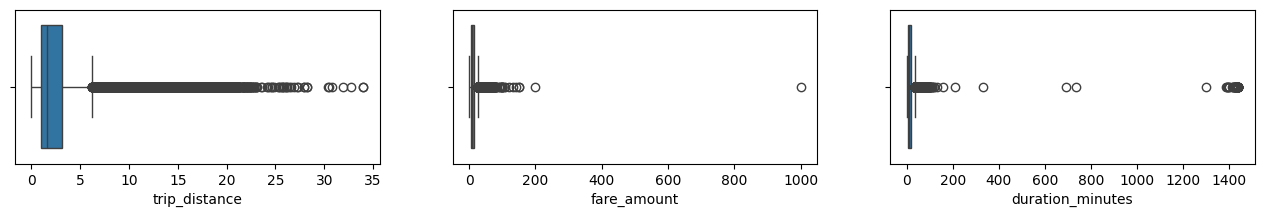

In [78]:
# Boxplots

fig, axes = plt.subplots(1, 3, figsize=(16, 2))
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration_minutes'])
plt.show();

Die Distribution der Ausreißer in `trip_distance` ist sinnvoll. Die Daten sind repräsentativ für die Population.

Die Ausreißer von `fare_amount` müssen behandelt werden.

In [79]:
# IQR


q3 = df1['fare_amount'].quantile(0.75)
q1 = df1['fare_amount'].quantile(0.25)
iqr = q3 - q1



for iqr_factor in np.arange(1.5, 10.6, 1.5):
    upper_threshold = q3 + (iqr_factor * iqr)
    print('the number of observations above upper threshold', upper_threshold, 'with iqr factor', iqr_factor, ':', df1[df1['fare_amount'] >= upper_threshold]['fare_amount'].value_counts().sum())

the number of observations above upper threshold 26.5 with iqr factor 1.5 : 2102
the number of observations above upper threshold 38.5 with iqr factor 3.0 : 972
the number of observations above upper threshold 50.5 with iqr factor 4.5 : 654
the number of observations above upper threshold 62.5 with iqr factor 6.0 : 74
the number of observations above upper threshold 74.5 with iqr factor 7.5 : 31
the number of observations above upper threshold 86.5 with iqr factor 9.0 : 17
the number of observations above upper threshold 98.5 with iqr factor 10.5 : 14


Überprüfen, wie viel die weiteste Fahrt gekostet hat

In [80]:
df1.sort_values(by='trip_distance', ascending=False).head(20)

,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_loc_id,do_loc_id,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,duration_minutes
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,...,0.0,0.0,0.00,0.00,0.3,150.30,June,Sunday,0 days 00:39:13,39.216667
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,...,0.0,0.5,51.64,5.76,0.3,258.21,May,Friday,0 days 01:00:09,60.150000
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,...,0.0,0.0,55.50,16.26,0.3,179.06,June,Tuesday,0 days 01:07:29,67.483333
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,...,0.0,0.5,0.00,0.00,0.3,131.80,September,Monday,0 days 00:37:54,37.900000
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,...,0.5,0.5,18.56,11.52,0.3,111.38,November,Monday,0 days 03:29:10,209.166667
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,...,0.0,0.5,19.85,8.16,0.3,119.31,October,Thursday,0 days 01:27:48,87.800000
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,...,0.0,0.5,14.64,5.76,0.3,73.20,August,Friday,0 days 01:03:30,63.500000
15350,77309977,2,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,2,N,13,132,...,0.0,0.5,4.40,5.76,0.3,62.96,September,Thursday,0 days 00:49:45,49.750000
10302,43431843,1,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,2,N,90,132,...,0.0,0.5,11.71,5.76,0.3,70.27,May,Monday,0 days 00:51:42,51.700000
2592,51094874,2,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,2,N,261,132,...,4.5,0.5,0.00,5.76,0.3,63.06,June,Friday,0 days 00:50:22,50.366667


Der beste IQR-Faktor ist **6**.

Ausreißer werden auf den Wert von 62,5$ umgerechnet.

In [81]:
upper_threshold = q3 + (6 * iqr)

df1.loc[df1['fare_amount'] > upper_threshold, 'fare_amount'] = upper_threshold

In [82]:
df1.describe()

,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecode_id,pu_loc_id,do_loc_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,duration_minutes
count,2.250200e+04,22502.000000,22502,22502,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,2.250200e+04,22502.000000,22502,22502.000000
mean,5.670286e+07,1.557595,2017-06-29 03:02:34.170695936,2017-06-29 03:19:38.167984896,1.646165,2.933469,1.032130,162.363168,161.451160,1.332859,12.876740,0.333881,0.498645,1.831236,0.309504,3.000000e-01,16.255711,0 days 00:17:03.997289129,17.066621
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,3.300000,0 days 00:00:01,0.016667
25%,2.847478e+07,1.000000,2017-03-29 23:54:26.249999872,2017-03-30 00:05:08.249999872,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.750000,0 days 00:06:44,6.733333
50%,5.669371e+07,2.000000,2017-06-23 08:54:12,2017-06-23 09:21:31,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,3.000000e-01,11.800000,0 days 00:11:14,11.233333
75%,8.526356e+07,2.000000,2017-10-01 17:12:44.249999872,2017-10-01 17:23:34.750000128,2.000000,3.090000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,3.000000e-01,17.800000,0 days 00:18:27,18.450000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,3.000000e-01,1200.290000,0 days 23:59:33,1439.550000
std,3.272175e+07,0.496683,NaN,NaN,1.285908,3.657716,0.231489,66.584459,70.082966,0.489927,10.420386,0.461800,0.025998,2.768066,1.385776,5.551238e-17,15.564941,0 days 01:01:33.963625192,61.566060


Mit denselben Methoden werden Ausreißer von `duration_minutes` überprüft.

In [83]:
# IQR


q3 = df1['duration_minutes'].quantile(0.75)
q1 = df1['duration_minutes'].quantile(0.25)
iqr = q3 - q1



for iqr_factor in np.arange(1.5, 10.6, 1.5):
    upper_threshold = q3 + (iqr_factor * iqr)
    print('the number of observations above upper threshold', upper_threshold.round(2), 'with iqr factor', iqr_factor, ':', df1[df1['duration_minutes'] >= upper_threshold]['duration_minutes'].value_counts().sum())

the number of observations above upper threshold 36.02 with iqr factor 1.5 : 1216
the number of observations above upper threshold 53.6 with iqr factor 3.0 : 369
the number of observations above upper threshold 71.18 with iqr factor 4.5 : 126
the number of observations above upper threshold 88.75 with iqr factor 6.0 : 69
the number of observations above upper threshold 106.32 with iqr factor 7.5 : 52
the number of observations above upper threshold 123.9 with iqr factor 9.0 : 47
the number of observations above upper threshold 141.47 with iqr factor 10.5 : 46


Der beste IQR-Faktor hier ist auch **6**.

In [84]:
upper_threshold = q3 + (6 * iqr)

df1.loc[df1['duration_minutes'] > upper_threshold, 'duration_minutes'] = upper_threshold

In [85]:
df1.describe()

,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecode_id,pu_loc_id,do_loc_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,duration_minutes
count,2.250200e+04,22502.000000,22502,22502,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,2.250200e+04,22502.000000,22502,22502.000000
mean,5.670286e+07,1.557595,2017-06-29 03:02:34.170695936,2017-06-29 03:19:38.167984896,1.646165,2.933469,1.032130,162.363168,161.451160,1.332859,12.876740,0.333881,0.498645,1.831236,0.309504,3.000000e-01,16.255711,0 days 00:17:03.997289129,14.548512
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,3.300000,0 days 00:00:01,0.016667
25%,2.847478e+07,1.000000,2017-03-29 23:54:26.249999872,2017-03-30 00:05:08.249999872,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.750000,0 days 00:06:44,6.733333
50%,5.669371e+07,2.000000,2017-06-23 08:54:12,2017-06-23 09:21:31,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,3.000000e-01,11.800000,0 days 00:11:14,11.233333
75%,8.526356e+07,2.000000,2017-10-01 17:12:44.249999872,2017-10-01 17:23:34.750000128,2.000000,3.090000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,3.000000e-01,17.800000,0 days 00:18:27,18.450000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,3.000000e-01,1200.290000,0 days 23:59:33,88.750000
std,3.272175e+07,0.496683,NaN,NaN,1.285908,3.657716,0.231489,66.584459,70.082966,0.489927,10.420386,0.461800,0.025998,2.768066,1.385776,5.551238e-17,15.564941,0 days 01:01:33.963625192,11.914360


### Feature-Engineering

Wir möchten ein Modell mit Daten trainieren, die wir vor einer Fahrtenerfassung und nicht danach erhalten. Daher können wir `trip_distance` und `duration_minutes` nicht als X-Variablen verwenden.

Wir können die Abhol- und Zielorte von Fahrten verwenden, um neue Variablen zu erstellen, die die Distanz und Dauer repräsentieren.

#### Erstellen der Variablen `mean_distance` und `mean_duration`

In [86]:
print('pickup locations: ', df1.drop_duplicates(subset='pu_loc_id').value_counts().sum())
print('drop off locations: ', df1.drop_duplicates(subset='do_loc_id').value_counts().sum())

pickup locations:  149
drop off locations:  216


Es gibt 149 und 216 einzigartige Abhol- und Abgabestellen. Wir werden eine neue Variable erstellen, die eine Kombination aus jedem dieser Werte ist.

Ich muss zuesrt die Variable `pickup_dropoff` erstellen

In [87]:
# Create `pickup_dropoff` column
df1['pickup_dropoff'] = df1['pu_loc_id'].astype(str) + ' ' + df1['do_loc_id'].astype(str)
df1['pickup_dropoff'].head(5)

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

In [88]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,7.300
10 148,15.700
100 1,16.890
100 100,0.304
100 107,1.180


In [89]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

#### Erstellen des Variables `mean_distance`

In [90]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Confirm that it worked
df1[(df1['pu_loc_id']==100) & (df1['do_loc_id']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Erstellen des Variables `mean_duration`

In [91]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration_minutes']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration_minutes']

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)

# Confirm that it worked
df1[(df1['pu_loc_id']==100) & (df1['do_loc_id']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Erstellen eine `rush_hour` Variable

Bisher haben wir die Variablen `day` und `month`, die wir verwenden können.
Wir können die verfügbaren Daten besser nutzen, indem wir eine Variable `rush_hour` erstellen, die uns Informationen über die Uhrzeit der Fahrt gibt.

* An jedem Wochentag (außer Samstag und Sonntag) UND
* Entweder von 06:00 bis 10:00 Uhr oder von 16:00 bis 20:00 Uhr

In [92]:
# Create 'rush_hour' col
df1['rush_hour'] = df1['pickup_datetime'].dt.hour.astype(int)

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[df['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0

In [93]:
def rush_hour_func(dataframe):
    if 6 <= dataframe['rush_hour'] < 10:
        hour = 1
    elif 16 <= dataframe['rush_hour'] < 20:
        hour = 1
    else:
        hour = 0
    return hour

# Apply the function
df1.loc[(df1['day'] != 'Saturday') & (df1['day'] != 'Sunday'), 'rush_hour'] = df1.apply(rush_hour_func, axis=1)
df1.head()

,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_loc_id,do_loc_id,...,improvement_surcharge,total_amount,month,day,trip_duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.3,16.56,March,Saturday,0 days 00:14:04,14.066667,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.3,20.80,April,Tuesday,0 days 00:26:30,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.3,8.75,December,Friday,0 days 00:07:12,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.3,27.69,May,Sunday,0 days 00:30:15,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.3,17.80,April,Saturday,0 days 00:16:43,16.716667,4 112,4.435000,14.616667,0


Jetzt haben wir alle Variablen, die wir in der linearen Regression verwenden wollen.  Ich entferne die Variablen, die ich nicht verwende.

In [94]:
df2 = df1.copy()

In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22502 entries, 0 to 22698
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22502 non-null  int64          
 1   vendor_id              22502 non-null  int64          
 2   pickup_datetime        22502 non-null  datetime64[ns] 
 3   dropoff_datetime       22502 non-null  datetime64[ns] 
 4   passenger_count        22502 non-null  int64          
 5   trip_distance          22502 non-null  float64        
 6   ratecode_id            22502 non-null  int64          
 7   store_and_fwd_flag     22502 non-null  object         
 8   pu_loc_id              22502 non-null  int64          
 9   do_loc_id              22502 non-null  int64          
 10  payment_type           22502 non-null  int64          
 11  fare_amount            22502 non-null  float64        
 12  extra                  22502 non-null  float64     

In [96]:
df2 = df2.drop(columns=['Unnamed: 0', 'pickup_datetime', 'dropoff_datetime','trip_distance', 'ratecode_id', 'store_and_fwd_flag',
                  'pu_loc_id', 'do_loc_id', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                  'improvement_surcharge', 'total_amount', 'month', 'day', 'trip_duration', 'duration_minutes',
                  'pickup_dropoff'])

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22502 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vendor_id        22502 non-null  int64  
 1   passenger_count  22502 non-null  int64  
 2   fare_amount      22502 non-null  float64
 3   mean_distance    22502 non-null  float64
 4   mean_duration    22502 non-null  float64
 5   rush_hour        22502 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


#### Überprüfung auf Multikollinearität

Erinnerung der Annahmen der linearen Regression:

1. Linearität
2. Homoskedastizität / Keine Autokorrelation der Residuen
3. Unabhängigkeit der Fehler
4. Normalverteilung der Residuen
5. Keine Multikollinearität

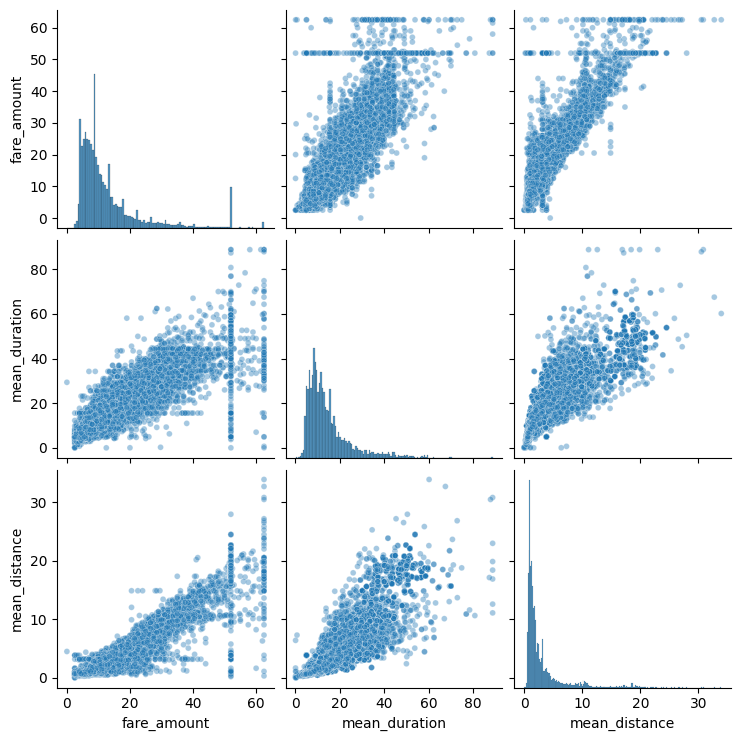

In [98]:
# pairplot

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

- Unsere kontinuierlichen Variablen sind rechtsschief verteilt.
- `mean_distance` und `mean_duration` sind positiv korreliert.
- Es gibt immer noch einige fehlerhafte Daten, wenn `fare_amount` etwa 50$ ist.

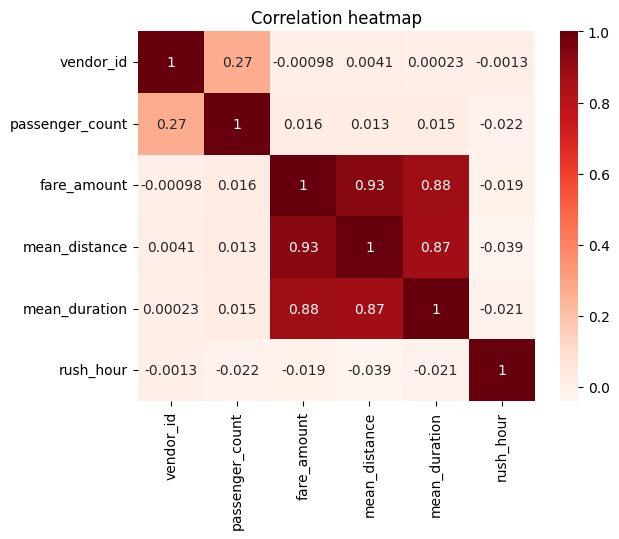

In [99]:
# heatmap

sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap')
plt.show()

Ich verwende dieses Modell, um `fare_amount` vorherzusagen, und nicht, um  Koeffizienten zu interpretieren oder einzelne Effekte zu verstehen.

Daher ist es akzeptabel, sowohl `mean_duration` als auch `mean_distance` beizubehalten.

#### Untersuchung der fehlerhaften Daten

In [100]:
df2.loc[(df2.fare_amount > 50) & (df2.fare_amount <= 55)]

,vendor_id,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
11,2,2,52.0,19.211667,40.494444,0
110,1,1,52.0,19.229000,52.941667,0
156,1,1,51.5,15.393333,64.305556,0
161,2,1,52.0,3.848235,4.954902,0
220,2,1,55.0,17.358571,42.697619,0
...,...,...,...,...,...,...
22593,1,1,52.0,16.580000,61.691667,1
22604,1,2,52.0,18.148750,56.850000,0
22620,2,3,52.0,22.115000,51.493750,0
22686,2,5,52.0,10.640000,80.750000,1


52$

In [101]:
df2.loc[df2.fare_amount ==52].reset_index().sort_values(by = 'fare_amount', ascending=True)

,index,vendor_id,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
472,21536,2,2,52.0,18.537500,37.000000,0
473,21636,1,1,52.0,19.140000,50.397222,0
474,21656,2,1,52.0,18.490000,47.613889,1
475,21820,1,1,52.0,18.745000,41.916667,0
476,21916,2,1,52.0,19.210000,39.976667,0
...,...,...,...,...,...,...,...
494,22604,1,2,52.0,18.148750,56.850000,0
495,22620,2,3,52.0,22.115000,51.493750,0
496,22686,2,5,52.0,10.640000,80.750000,1
497,22695,2,1,52.0,18.757500,59.560417,0


Vielleicht würde die Verwendung des Originaldatensatzes mehr Klarheit schaffen.

In [102]:
df_edit = df1.loc[df1.fare_amount == 52].reset_index().sort_values(by = 'fare_amount', ascending=True)
df_edit.to_csv(path_or_buf="data/52_dollar_fare.csv")

Die Werte von `fare_amount`, die 52 $ betragen, beziehen sich alle auf RatecodeID = 2, also auf Fahrpreise zum Flughafen JFK.

Sie bieten keine Vorhersagekraft für das Modell, daher werde ich sie entfernen.

In [103]:
df2 = df1.copy()

df2 = df2.loc[df2.ratecode_id != 2]

df2 = df2.drop(columns=['Unnamed: 0', 'pickup_datetime', 'dropoff_datetime','trip_distance', 'ratecode_id', 'store_and_fwd_flag',
                  'pu_loc_id', 'do_loc_id', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                  'improvement_surcharge', 'total_amount', 'month', 'day', 'trip_duration', 'duration_minutes',
                  'pickup_dropoff'])

df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22005 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vendor_id        22005 non-null  int64  
 1   passenger_count  22005 non-null  int64  
 2   fare_amount      22005 non-null  float64
 3   mean_distance    22005 non-null  float64
 4   mean_duration    22005 non-null  float64
 5   rush_hour        22005 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Validierung der Ergebnisse

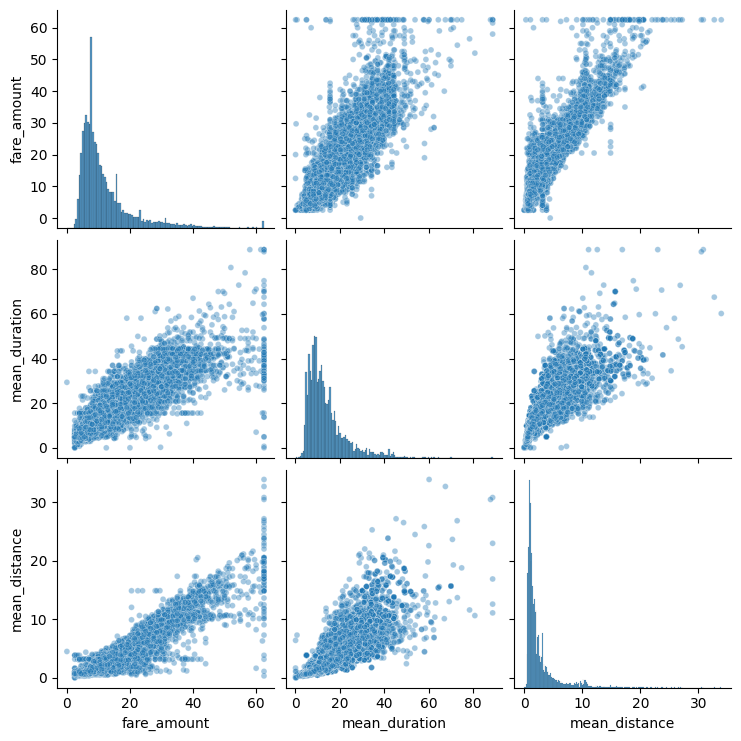

In [104]:
# pairplot

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

Die übrigen Annahmen der linearen Regression werden im Anschluss überprüft.

#### Linear Regression

In [105]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

In [106]:
# Convert VendorID to string
X['vendor_id'] = X['vendor_id'].astype(str)
# Get dummies
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,vendor_id_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [107]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Standardisierung der Daten zur Verbesserung der Model-Performance

In [108]:
# Standardize the X variables

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.27672875  3.46013546  0.81134594 -0.65118463 -1.1233222 ]
 [ 0.27672875 -0.47972446 -0.53592729 -0.65118463  0.89021654]
 [ 0.27672875 -0.68812871 -0.30513472 -0.65118463  0.89021654]
 ...
 [-0.50209346 -0.49618447 -0.40572323  1.53566279 -1.1233222 ]
 [-0.50209346 -0.56847545 -0.86383221  1.53566279  0.89021654]
 [-0.50209346 -0.58773367 -0.37123229 -0.65118463  0.89021654]]


In [109]:
# Fit your model to the training data

lr=LinearRegression()
lr.fit(X_train_scaled, y_train);

Ergebnisse unter Verwendung von Trainingsdaten

In [110]:
# Evaluate the model performance on the training data

r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8747162689921012
R^2: 0.8747162689921012
MAE: 1.9159105766466933
MSE: 9.484765339352835
RMSE: 3.0797346215790795


Ergebnisse unter Verwendung von Testdaten

In [111]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8723118890695459
R^2: 0.8723118890695459
MAE: 1.9067089059704898
MSE: 9.650412236393567
RMSE: 3.1065112644884403


Interpretation:
- Etwa 87 % der Varianz in der Zielvariablen wird durch die Prädiktoren erklärt, sowohl beim Training als auch beim Testen.
- Die Nähe von Trainings- und Test-R² bedeutet eine geringe Überanpassung. Das Modell lässt sich gut generalisieren.

#### Ergebnisse und Umgang mit restlichen Annahmen der linearen Regression

In [112]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,vendor_id_2
0,0.047571,5.778315,2.648934,0.155495,-0.041104


Die Daten wurden skaliert, daher müssen sie vor einer Interpretation der Ergebnisse entskaliert werden.

In [113]:
# Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# Divide the model coefficient by the standard deviation
print(5.778315 / X_train['mean_distance'].std())

2.800517522310899
2.063302569602177


Pro 2,8 Meilen stieg der Fahrpreis um durchschnittlich 5,78 $.

Oder anders ausgedrückt: Pro 1 Meile stieg der Fahrpreis um durchschnittlich 2,06 $.

In [114]:
# Results table

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']

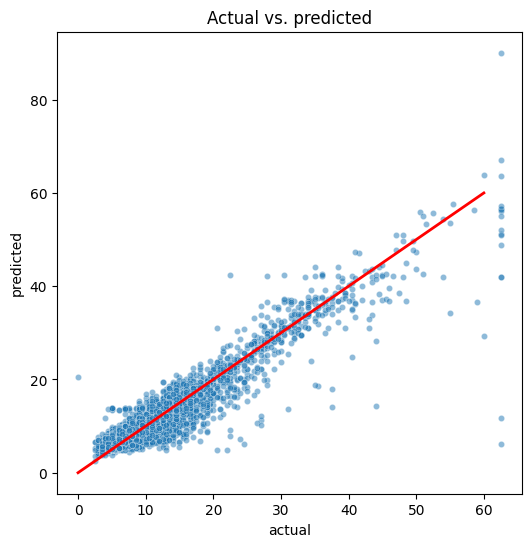

In [115]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

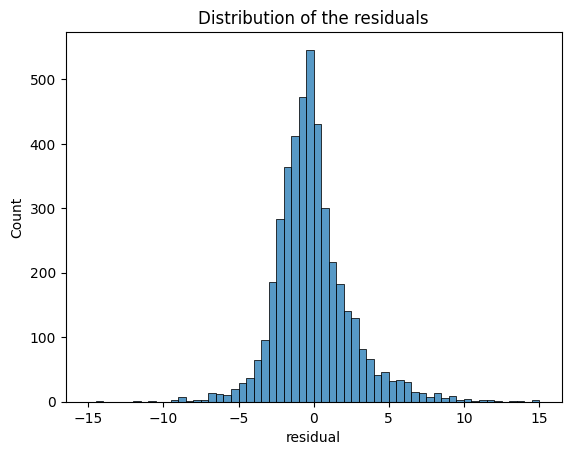

In [116]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals');

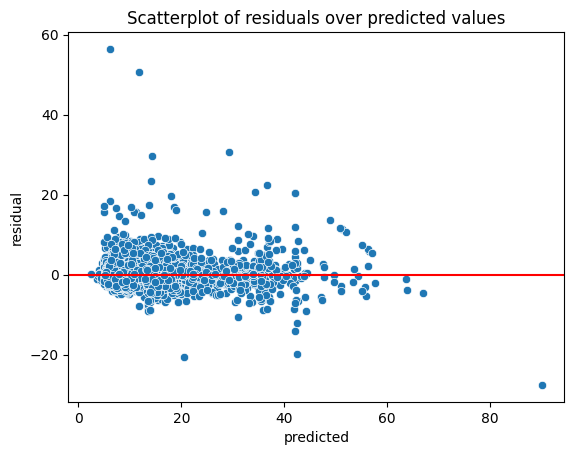

In [117]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.show()

- Die Residuen des Modells sind normalverteilt.
- Die Residuen des Modells sind gleichmäßig verteilt.

### Machine-Learning Modelle

#### Decision Tree Regressor mit GridsearchCV

In [118]:
# Creating validation and training data

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state= 0, test_size=0.20)

# X_train: training data for ML models that do use gridsearchch
# X_tr: training data for ML models that don't use gridsearchcv
# X_val: validation data for ML models that don't use gridsearchcv
# X_test: testing data for all models


Mir ist die Optimierung des RMSE wichtig, um den genauesten Fahrpreis vorhersagen zu können.

Wir legen keinen Wert auf Erklärbarkeit, sondern auf Vorhersagbarkeit.

In [119]:
#Hyperparameters:
# there are few features so i won't be adding the number of features to hyperparameters
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 6]
}

#scoring
scoring = {
    'r2': 'r2',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error'
}

In [120]:
# Instantiating model
dr = DecisionTreeRegressor(random_state=0)

In [121]:
# Fitting model
tree1 = GridSearchCV(dr, cv_params, scoring= scoring, cv=5, refit='neg_rmse')
tree1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='neg_rmse',
             scoring={'neg_mae': 'neg_mean_absolute_error',
                      'neg_mse': 'neg_mean_squared_error',
                      'neg_rmse': 'neg_root_mean_squared_error', 'r2': 'r2'})

In [122]:
# Parameters for best results:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

#### Ergebnisse

In [123]:
def get_scores(model_name:str, model, X_data, y_data):
    '''
    Generate a table of test scores and the y-preds of the X test data.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_data:          numpy array of X_test data
        y_data:          numpy array of y_test data

    Out: pandas df of scores for your model
        
    '''

    preds = model.best_estimator_.predict(X_data)

    r_squared = r2_score(y_data, preds)
    mse = mean_squared_error(y_data, preds)
    rmse = root_mean_squared_error(y_data, preds)
    mae = mean_absolute_error(y_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'R_squared': [r_squared], 
                          'MSE': [mse],
                          'RMSE': [rmse],
                          'MAE': [mae]
                         })
    
    return table

In [124]:
results_table = pd.concat([get_scores('decision tree1 training', tree1, X_train, y_train), get_scores('decision tree1 testing', tree1, X_test, y_test)])
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463


#### Hyperparameter-Optimierung

In [125]:
#Hyperparameters:
cv_params = {
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 6]
}

# Fitting model
tree2 = GridSearchCV(dr, cv_params, scoring= scoring, cv=5, refit='neg_rmse')
tree2.fit(X_train, y_train)

# Parameters for best results:
tree2.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}

#### Ergebnisse

In [126]:
tree2_train = get_scores('decision tree2 training', tree2, X_train, y_train)
tree2_test = get_scores('decision tree2 testing', tree2, X_test, y_test)
results_table = pd.concat([results_table, tree2_train, tree2_test])
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,decision tree2 training,0.891081,8.245860,2.871561,1.877014
0,decision tree2 testing,0.858617,10.685429,3.268858,2.015889


tree1 ist besser als tree2, weil der RMSE zwischen Trainings- und Testdaten geringer ist. Die besten Parameter des tree1 sind am besten.

In [127]:
results_table = results_table.iloc[:-2,]
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463


#### Random Forst Modell mit GridsearchCV

In [128]:
# Hyperparameters
cv_params = {
    'max_depth': [3, 5, None],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500],
    'max_features': [None, 'sqrt']
}

#scoring
scoring = {
    'r2': 'r2',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error'
}

In [129]:
# Instantiate model
rf = RandomForestRegressor(random_state=0)

In [130]:
# Instantiate GridSearch
#rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='neg_rmse', n_jobs=-1)

#y_train = np.ravel(y_train)
#rf1.fit(X_train, y_train)

In [131]:
# Pickling because this model takes a long time to run:

path = 'pickled_models/'

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [132]:
# Write pickle
#write_pickle(path, rf1, 'hr_rf1')

In [133]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

#### Ergebnisse

In [134]:
rf1_training = get_scores('random forest 1 training', rf1, X_train, y_train)
rf1_testing = get_scores('random forest 1 testing', rf1, X_test, y_test)
results_table = pd.concat([results_table, rf1_training, rf1_testing])
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,random forest 1 training,0.881584,8.964864,2.994138,1.936885
0,random forest 1 testing,0.870192,9.810603,3.132188,1.977648


#### Hyperparameter-Optimierung - Erste Runde

Dieses Modell ist sehr groß (70 MB), daher entferne ich es, um es auf GitHub hochladen zu können.

In [135]:
# Deeper tree but risks overfitting
cv_params = {
    'max_depth': [10, 12, 15],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [700, 1000],
    'max_features': [None, 'sqrt']
}


# Instantiate GridSearch
#rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='neg_rmse', n_jobs=-1, verbose=2)
#rf2.fit(X_train, y_train)

In [136]:
# Write pickle
#write_pickle(path, rf2, 'hr_rf2')

In [137]:
# Read pickle
#rf2 = read_pickle(path, 'hr_rf2')

# Check best params
#rf2.best_params_

#### Ergebnisse

In [138]:
#rf2_training = get_scores('random forest 2 training', rf2, X_train, y_train)
#rf2_testing = get_scores('random forest 2 testing', rf2, X_test, y_test)
#results_table = pd.concat([results_table, rf2_training, rf2_testing])
#results_table

Schlechtere Ergebnisse als Random Forest 1

Ich werde nun Parameter verwenden, die die Parameter aus dem ersten Random-Forest-Modell erweitern.

#### Hyperparameter-Optimierung - Zweite Runde

In [139]:
cv_params = {
    'max_depth': [5, 6, 7, 8],
    'max_samples': [0.6, 0.7, 0.85, 1],       
    'min_samples_leaf': [2, 3, 4, 5],         
    'min_samples_split': [2, 3, 4],           
    'n_estimators': [500, 700],            
    'max_features': ['sqrt', None]         
}

# Instantiate GridSearch
#rf3 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='neg_rmse', n_jobs=-1, verbose=2)
#rf3.fit(X_train, y_train)

In [140]:
# Write pickle
#write_pickle(path, rf3, 'hr_rf3')

In [141]:
# Read pickle
rf3 = read_pickle(path, 'hr_rf3')

# Check best params
rf3.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_samples': 0.6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 700}

#### Ergebnisse

In [142]:
rf3_training = get_scores('random forest 3 training', rf3, X_train, y_train)
rf3_testing = get_scores('random forest 3 testing', rf3, X_test, y_test)
results_table = pd.concat([results_table, rf3_training, rf3_testing])
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,random forest 1 training,0.881584,8.964864,2.994138,1.936885
0,random forest 1 testing,0.870192,9.810603,3.132188,1.977648
0,random forest 3 training,0.885337,8.680679,2.946299,1.898975
0,random forest 3 testing,0.870772,9.766757,3.125181,1.947196


#### Hyperparameter-Optimierung - Dritte Runde

In [143]:
cv_params = {
    'max_depth': [5, 6, 7],
    'max_samples': [0.5, 0.6, 0.7],       
    'min_samples_leaf': [2, 3, 4],         
    'min_samples_split': [2, 3, 4],           
    'n_estimators': [500, 700],            
    'max_features': ['sqrt', None]         
}

# Instantiate GridSearch
#rf4 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='neg_rmse', n_jobs=-1, verbose=2)
#rf4.fit(X_train, y_train)

In [144]:
# Write pickle
#write_pickle(path, rf4, 'hr_rf4')

In [145]:
# Read pickle
rf4 = read_pickle(path, 'hr_rf4')

# Check best params
rf4.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 700}

#### Ergebnisse

In [146]:
rf4_training = get_scores('random forest 4 training', rf4, X_train, y_train)
rf4_testing = get_scores('random forest 4 testing', rf4, X_test, y_test)
results_table = pd.concat([results_table, rf4_training, rf4_testing])
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,random forest 1 training,0.881584,8.964864,2.994138,1.936885
0,random forest 1 testing,0.870192,9.810603,3.132188,1.977648
0,random forest 3 training,0.885337,8.680679,2.946299,1.898975
0,random forest 3 testing,0.870772,9.766757,3.125181,1.947196
0,random forest 4 training,0.885082,8.700025,2.949580,1.898524
0,random forest 4 testing,0.870950,9.753349,3.123035,1.944780


Sehr minimale Verbesserung. Das Ergebnis ist insofern nachvollziehbar, als die Daten viele Ausreißer enthalten.

In [147]:
results_table = results_table.iloc[[0,1,-2,-1],]
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,random forest 4 training,0.885082,8.700025,2.949580,1.898524
0,random forest 4 testing,0.870950,9.753349,3.123035,1.944780


#### XG Boost Modell mit GridSearchCV

In [148]:
#Instanstiating XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=0)

In [149]:
# Hyperparameters
cv_params = {
    'max_depth': [3, 4, 6],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}


scoring = {
    'r2': 'r2',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error'
}

In [150]:
# Instantiating gridsearchcv
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'neg_rmse', n_jobs=-1, verbose=2)

In [151]:
# Fitting model
#xgb_cv.fit(X_train, y_train)

In [152]:
# Write pickle
#write_pickle(path, xgb_cv, 'hr_xgb')

In [153]:
# Read in pickle
xgb_cv = read_pickle(path, 'hr_xgb')

xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 1.0}

#### Ergebnisse

In [154]:
xgb_training = get_scores('XGBoost 1 training', xgb_cv, X_train, y_train)
xgb_testing = get_scores('XGBoost 1 testing', xgb_cv, X_test, y_test)
results_table = pd.concat([results_table, xgb_training, xgb_testing])
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,random forest 4 training,0.885082,8.700025,2.949580,1.898524
0,random forest 4 testing,0.870950,9.753349,3.123035,1.944780
0,XGBoost 1 training,0.883273,8.836954,2.972702,1.898386
0,XGBoost 1 testing,0.872408,9.643154,3.105343,1.927429


#### Hyperparameter-Optimierung

In [155]:
cv_params = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2],
    'learning_rate': [0.03, 0.05, 0.07],
    'n_estimators': [300, 500, 700],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Instantiating gridsearchcv
xgb_cv2 = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'neg_rmse', n_jobs=-1, verbose=2)

# Fitting model
#xgb_cv2.fit(X_train, y_train)

In [156]:
# Write pickle
#write_pickle(path, xgb_cv2, 'hr_xgb2')

In [157]:
# Read in pickle
xgb_cv2 = read_pickle(path, 'hr_xgb2')

xgb_cv2.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.8}

#### Ergebnisse

In [158]:
xgb_training2 = get_scores('XGBoost 2 training', xgb_cv2, X_train, y_train)
xgb_testing2 = get_scores('XGBoost 2 testing', xgb_cv2, X_test, y_test)
results_table = pd.concat([results_table, xgb_training2, xgb_testing2])
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,random forest 4 training,0.885082,8.700025,2.949580,1.898524
0,random forest 4 testing,0.870950,9.753349,3.123035,1.944780
0,XGBoost 1 training,0.883273,8.836954,2.972702,1.898386
0,XGBoost 1 testing,0.872408,9.643154,3.105343,1.927429
0,XGBoost 2 training,0.883026,8.855702,2.975853,1.897313
0,XGBoost 2 testing,0.873461,9.563525,3.092495,1.918444


**Das Modell konvergiert. Eine weitere Hyperparameter-Optimierung wäre nicht sehr effizient.**

#### Eine Tabelle mit dem besten Modell jedes Modelltyps.

In [159]:
results_table = results_table.iloc[[0,1,2,3,6,7],]
results_table

,model,R_squared,MSE,RMSE,MAE
0,decision tree1 training,0.881723,8.954337,2.992380,1.963505
0,decision tree1 testing,0.860623,10.533808,3.245583,2.037463
0,random forest 4 training,0.885082,8.700025,2.949580,1.898524
0,random forest 4 testing,0.870950,9.753349,3.123035,1.944780
0,XGBoost 2 training,0.883026,8.855702,2.975853,1.897313
0,XGBoost 2 testing,0.873461,9.563525,3.092495,1.918444


## 4. Abschluss

Das zweite XGBoost-Modell ist das beste Modell. Der RMSE zwischen den Trainings- und Testdaten ist am geringsten. Außerdem ist der RMSE im Allgemeinen der niedrigste aller anderen Modelle. Ich habe den RMSE als Maßstab für den Vergleich der Modelle verwendet, da es für das Taxi- und Limousinenunternehmen wichtig ist, den korrekten Preis für jede Fahrt zu schätzen.

Die Herausforderung bei der Optimierung des Hyperparameters ergibt sich aus den Daten, die viele Ausreißer enthalten.


Nächste Schritte:

Das Modellieren mit den originalen Features vor der Feature-Transformation wiederholen. Es sollte möglich sein, den Fahrpreis mit den originalen Features zu prognostizieren. Die genauen Distanzen einer Fahrt können vor Antritt der Fahrt mithilfe von Services von Google oder Apple ermittelt werden. Die Verwendung von Durchschnittsdistanzwerten könnte eine Ersatzmethode zur Prognose des Fahrpreises sein, wenn die Positionsdaten unbekannt sind.